![title](img/image.png)

![image(1).png](img/image2.png)

![title](img/image3.png)

# 1. 라이브러리 및 데이터 불러오기

In [612]:
import requests
import pandas as pd
import numpy  as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

from json import JSONDecodeError

# 그래프 스타일 설정
plt.style.use("ggplot")

# 폰트설정
plt.rc("font", family="AppleGothic")

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 과학표기를 실수형으로 설정
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/21/j_x6z79s3kq2y6dtypdlmh8r0000gn/T/ipykernel_3204/3218091184.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<div style="font-size: 16px;">데이터 수집 방법 <br>
- 1. kofic db의 모든 영화 데이터를 가져옵니다.(크롤링) <br>
- 2. kofic 영화 주별 박스오피스 top 10 open api에 2021년 8월 5일까지의 데이터를 가져옵니다. <br>
- 3. kofic 영화 상세정보 open api를 전부 불러옵니다. </div>

In [613]:
movie_basic_df  = pd.read_csv("data/movie_basic_info.csv")
movie_detail_df = pd.read_csv("data/movie_detail_info.csv")
weekly_movie_df = pd.read_csv("data/movie_external_info.csv")

movie_detail_df = movie_detail_df[~movie_detail_df.duplicated()].reset_index(drop=True)

In [614]:
movie_detail_df.head(2)

movieCd        movieNm  showTm  openDt prdtStatNm typeNm  \
0  20205241       게임 오브 데스  73.000     NaN         기타     장편   
1  20205021  6 솔져스: 라스트 미션 114.000     NaN         기타     장편   

                                             nations  \
0  [{'nationNm': '프랑스'}, {'nationNm': '캐나다'}, {'n...   
1        [{'nationNm': '인도네시아'}, {'nationNm': '미국'}]   

                                              genres  \
0  [{'genreNm': '액션'}, {'genreNm': '스릴러'}, {'genr...   
1             [{'genreNm': '액션'}, {'genreNm': 'SF'}]   

                                           directors  \
0  [{'peopleNm': '세바스티안 랜드리', 'peopleNmEn': 'Seba...   
1                                                 []   

                                              actors  \
0  [{'peopleNm': '샘얼', 'peopleNmEn': 'Sam Earle',...   
1  [{'peopleNm': '오카 안타라', 'peopleNmEn': 'Oka Ant...   

                                          showTypes  \
0  [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'}]   
1                                                []   

                                            companys  \
0                                                 []   
1  [{'companyCd': '20139757', 'companyNm': '(주)엔케...   

                                  audits staffs  
0  [{'auditNo': '', 'watchGradeNm': ''}]     []  
1                                     []     []

# 2 데이터 병합

In [615]:
print(movie_detail_df.duplicated().sum())
print(weekly_movie_df.duplicated().sum())

0
0


In [616]:
movie_df = pd.merge(weekly_movie_df, movie_detail_df, how='inner', on=["movieCd", "movieNm"])

In [617]:
movie_df.shape

(2887, 17)

In [618]:
movie_df.describe()

audiAcc         salesAcc   showTm     openDt_y
count     2887.000         2887.000 2880.000     2882.000
mean    943282.345   7123081079.621  109.415 20120953.751
std    1751613.764  13749339277.595   18.744    51098.955
min         37.000       321500.000   20.000 19900707.000
25%      83576.000    621717000.000   97.000 20080306.000
50%     285903.000   2015696000.000  108.000 20120815.000
75%     986664.000   7195062750.000  120.000 20161219.500
max   17597914.000 139494525676.000  262.000 20210325.000

In [619]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 0 to 2886
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movieCd     2887 non-null   object 
 1   movieNm     2887 non-null   object 
 2   openDt_x    2887 non-null   object 
 3   audiAcc     2887 non-null   int64  
 4   salesAcc    2887 non-null   int64  
 5   showTm      2880 non-null   float64
 6   openDt_y    2882 non-null   float64
 7   prdtStatNm  2886 non-null   object 
 8   typeNm      2887 non-null   object 
 9   nations     2887 non-null   object 
 10  genres      2887 non-null   object 
 11  directors   2887 non-null   object 
 12  actors      2887 non-null   object 
 13  showTypes   2887 non-null   object 
 14  companys    2887 non-null   object 
 15  audits      2887 non-null   object 
 16  staffs      2887 non-null   object 
dtypes: float64(2), int64(2), object(13)
memory usage: 406.0+ KB


In [620]:
movie_df["typeNm"].value_counts()

장편      2875
옴니버스       9
단편         2
기타         1
Name: typeNm, dtype: int64

In [621]:
movie_df["audiAcc"].sort_values()

2881          37
2882          47
2883          59
2884         103
2885         195
          ...   
175     13967427
1091    14198690
559     14398110
365     16243231
1164    17597914
Name: audiAcc, Length: 2887, dtype: int64

- 위 영화의 관객 수가 심하게 적은 걸 볼 수 있는데, 실제로는 흥행한 영화로 확인이 되었습니다. <br>
따라서, 전산 상의 오류나 시스템 문제라고 생각 할 수 있고, <br>
현재 선정한 데이터 셋은 주간 top 10 영화들의 리스트이므로 오류일 가능성이 높은 관객 수는 drop 하도록 하겠습니다. <br>
오류 기준치는 임의로 10,000명으로 잡고 기준치 이하는 전부 drop 하고 앞으로 계속 진행하도록 하겠습니다. <br>

In [622]:
movie_df = movie_df[movie_df["audiAcc"] > 10000].reset_index(drop=True)

In [623]:
len(movie_df[movie_df["staffs"] == "[]"])

1636

staffs는 결측치가 너무 많은 관계로 drop을 합니다. <br>
typeNm은 데이터 편향이 거의 한 쪽으로 쏠렸기 때문에 drop 하도록 합니다.

In [624]:
movie_df = movie_df.drop(["openDt_y", "staffs", "typeNm"], axis=1)
movie_df = movie_df.rename(columns={"openDt_x": "openDt"})
movie_df.head(3)

movieCd            movieNm      openDt  audiAcc     salesAcc  showTm  \
0  20200703  극장판 귀멸의 칼날: 무한열차편  2021-01-27  2144756  20600511710 116.000   
1  20215850          고질라 VS. 콩  2021-03-25   698084   6722237990 113.000   
2  20200263        라야와 마지막 드래곤  2021-03-04   312814   2891566280 114.000   

  prdtStatNm               nations  \
0         개봉  [{'nationNm': '일본'}]   
1         개봉  [{'nationNm': '미국'}]   
2         개봉  [{'nationNm': '미국'}]   

                                              genres  \
0                             [{'genreNm': '애니메이션'}]   
1                                [{'genreNm': '액션'}]   
2  [{'genreNm': '애니메이션'}, {'genreNm': '액션'}, {'ge...   

                                           directors  \
0  [{'peopleNm': '소토자키 하루오', 'peopleNmEn': 'Haruo...   
1  [{'peopleNm': '아담 윈가드', 'peopleNmEn': 'Adam Wi...   
2  [{'peopleNm': '돈 홀', 'peopleNmEn': 'Don Hall'}...   

                                              actors  \
0  [{'peopleNm': '하나에 나츠키', 'peopleNmEn': 'Natsuk...   
1  [{'peopleNm': '알렉산더 스카스가드', 'peopleNmEn': 'Ale...   
2  [{'peopleNm': '켈리 마리 트란', 'peopleNmEn': 'Kelly...   

                                           showTypes  \
0  [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'...   
1  [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'...   
2  [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'...   

                                            companys  \
0  [{'companyCd': '20191941', 'companyNm': '워터홀컴퍼...   
1  [{'companyCd': '20100043', 'companyNm': '워너브러더...   
2  [{'companyCd': '20161801', 'companyNm': '월트디즈니...   

                                              audits  
0  [{'auditNo': '2020-MF02752', 'watchGradeNm': '...  
1  [{'auditNo': '2021-MF00550', 'watchGradeNm': '...  
2  [{'auditNo': '2021-MF00336', 'watchGradeNm': '...

# 3.데이터 전처리

## 1) JSON 형태로 변환

In [625]:
movie_df["actors"][2]

"[{'peopleNm': '켈리 마리 트란', 'peopleNmEn': 'Kelly Marie Tran', 'cast': '', 'castEn': ''}, {'peopleNm': '아콰피나', 'peopleNmEn': 'Awkwafina', 'cast': '', 'castEn': ''}, {'peopleNm': '산드라 오', 'peopleNmEn': 'Sandra Oh', 'cast': '', 'castEn': ''}, {'peopleNm': '대니얼 대 킴', 'peopleNmEn': 'Daniel Dae Kim', 'cast': '', 'castEn': ''}, {'peopleNm': '젬마 찬', 'peopleNmEn': 'Gemma Chan', 'cast': '', 'castEn': ''}]"

In [626]:
print(movie_df["actors"][2][0])

[


In [627]:
# 1. 작은 따옴표라서 json.loads 하기 힘듦
# 2. 중간에 따옴표가 불규칙적으로 들어가져 있음
# companyNmEn: 'The Walt Dis'ney Company Korea'

In [628]:
def delete_quotes(x):
    x = x.split(":")
    for index, char_piece in enumerate(x):
        quote_indices = [i for i, x in enumerate(char_piece) if x == "\""]
        
        if (index == 0) or (index == len(x) - 1):
            max_num_of_quote = 2
            num_of_out_quote = max_num_of_quote - len(quote_indices)
        
            # 따옴표가 2개 초과라면
            if num_of_out_quote:
                char_piece = list(char_piece)
                
                num_of_del = 0
                for i in quote_indices[1: -1]:
                    quote     = char_piece[i]
                    pre_char  = char_piece[i - 1]
                    next_char = char_piece[i + 1]
                    
                    del char_piece[i - num_of_del]
                    num_of_del += 1
                x[index] = ''.join(char_piece)
        else:
            max_num_of_quote = 4
            num_of_out_quote = max_num_of_quote - len(quote_indices)
            
            # 따옴표가 4개 초과라면
            if num_of_out_quote:
                char_piece  = list(char_piece)
                comma_index = char_piece.index(',')
                
                key_quote_1   = quote_indices[0]
                key_quote_2   = comma_index - 1
                value_quote_1 = comma_index + 2
                value_quote_2 = quote_indices[-1]
                
                if "{" in char_piece:
                    key_quote_2   = comma_index - 2
                    value_quote_1 = comma_index + 3
                true_quote    = [key_quote_1, key_quote_2, value_quote_1, value_quote_2]
                false_quote   = sorted(list(set(quote_indices) - set(true_quote)))
                
                num_of_del = 0
                for i in false_quote:
                    del char_piece[i - num_of_del]
                    num_of_del += 1
                    
                x[index] = ''.join(char_piece)
            
    return ':'.join(x)

def str_to_dict(x):
    x = x.replace("'", '"')
    try:
        result = json.loads(x)
    except JSONDecodeError:
        result = delete_quotes(x)
        result = json.loads(result)
        
    return result

In [629]:
dict_cols = [
    "nations", "genres", "directors",
    "actors", "showTypes", 
    "companys", "audits"
]

for col in dict_cols:
    movie_df[col] = movie_df[col].apply(str_to_dict)

In [630]:
movie_df["actors"][2]

[{'peopleNm': '켈리 마리 트란',
  'peopleNmEn': 'Kelly Marie Tran',
  'cast': '',
  'castEn': ''},
 {'peopleNm': '아콰피나', 'peopleNmEn': 'Awkwafina', 'cast': '', 'castEn': ''},
 {'peopleNm': '산드라 오', 'peopleNmEn': 'Sandra Oh', 'cast': '', 'castEn': ''},
 {'peopleNm': '대니얼 대 킴',
  'peopleNmEn': 'Daniel Dae Kim',
  'cast': '',
  'castEn': ''},
 {'peopleNm': '젬마 찬', 'peopleNmEn': 'Gemma Chan', 'cast': '', 'castEn': ''}]

## 2) 결측치 처리

In [631]:
movie_df.isnull().sum()

movieCd       0
movieNm       0
openDt        0
audiAcc       0
salesAcc      0
showTm        7
prdtStatNm    1
nations       0
genres        0
directors     0
actors        0
showTypes     0
companys      0
audits        0
dtype: int64

In [632]:
movie_df = movie_df.dropna().reset_index(drop=True)

In [633]:
dict_cols = [
    "nations", "genres", "directors", 
    "actors", "showTypes", 
    "companys", "audits"
]

def fill_blank(x):
    if x == []:
        return "없음"
    else:
        return x

for col in dict_cols:
    movie_df[col] = movie_df[col].apply(fill_blank)

## 3) 날짜 전처리 및 변환

날짜 형태가 yyyy-mm-dd인 row가 존재한다.

In [634]:
not_date = []
for i in range(len(movie_df)):
    date = movie_df.loc[i, "openDt"]
    if len(date) != 10:
        not_date.append(i)
        
movie_df = movie_df.drop(not_date).reset_index(drop=True)
movie_df.shape

(2825, 14)

In [635]:
movie_df["openDt"]    = movie_df["openDt"].astype("datetime64")
movie_df["openYear"]  = movie_df["openDt"].dt.year
movie_df["openMonth"] = movie_df["openDt"].dt.month
movie_df["openDay"]   = movie_df["openDt"].dt.day

movie_df = movie_df.drop(["openDt"], axis=1)

## 4) nations 전처리

In [636]:
def get_nation(x):
    if x == '없음':
        return x
    return x[0]['nationNm']

movie_df['nations'] = movie_df['nations'].apply(get_nation)

In [637]:
etc_nations = movie_df["nations"].value_counts()[movie_df["nations"].value_counts() <= 5].index
movie_df["nations"] = movie_df["nations"].map(lambda x: "기타" if x in etc_nations else x)

In [638]:
pd.options.display.max_rows = 20
movie_df["nations"].value_counts()[:20]

미국      1258
한국      1014
일본       181
영국        79
프랑스       70
중국        41
기타        35
독일        31
홍콩        27
스페인       22
러시아       12
이탈리아      11
호주        10
캐나다        8
벨기에        7
태국         7
인도         6
대만         6
Name: nations, dtype: int64

## 5) showTypes 전처리

In [639]:
# showTypeGroupNm 전처리
for i in range(len(movie_df)):
    movie_df.loc[i, 'showTypeGroupNm'] = movie_df['showTypes'][i][0]['showTypeGroupNm']
    movie_df.loc[i, 'showTypeNm'] = movie_df['showTypes'][i][0]['showTypeNm']
    
movie_df = movie_df.drop(['showTypes'],axis=1)
movie_df["showTypeNm"].value_counts()

필름        1983
디지털        813
디지털 더빙      27
가치봄          2
Name: showTypeNm, dtype: int64

데이터가 편향적이라고 볼 수 있습니다. 따라서 디지털 더빙과 가치봄을 디지털 카테고리에 넣겠습니다.

In [640]:
def change_to_digital(x):
    if (x == "디지털 더빙") or (x == "가치봄"):
        return "디지털"
    return x
movie_df["showTypeNm"] = movie_df["showTypeNm"].apply(change_to_digital)
movie_df["showTypeNm"].value_counts()

필름     1983
디지털     842
Name: showTypeNm, dtype: int64

In [641]:
print(movie_df["showTypeNm"].value_counts())
print(movie_df["showTypeGroupNm"].value_counts())

필름     1983
디지털     842
Name: showTypeNm, dtype: int64
필름    1985
2D     840
Name: showTypeGroupNm, dtype: int64


- 두 열의 큰 차이점이 없고 필름과 디지털을 구분하는 것이 유의미 하다 판단하여, <br>
showTypeGroupNm을 drop 하도록 하겠습니다.

In [642]:
movie_df = movie_df.drop(["showTypeGroupNm"], axis=1)

## 6) audits 전처리

In [643]:
def get_watchgrade(x):
    if x == "없음":
        return x
    return x[0]['watchGradeNm']

movie_df["audits"] = movie_df["audits"].apply(get_watchgrade)

In [644]:
print(movie_df["audits"].value_counts().index)
movie_df["audits"].value_counts()

Index(['15세이상관람가', '12세이상관람가', '전체관람가', '청소년관람불가', '15세관람가', '12세관람가',
       '18세관람가', '중학생이상관람가', '', '모든 관람객이 관람할 수 있는 등급', '고등학생이상관람가',
       '15세 미만인 자는 관람할 수 없는 등급 '],
      dtype='object')


15세이상관람가                   860
12세이상관람가                   610
전체관람가                      573
청소년관람불가                    369
15세관람가                     206
12세관람가                     122
18세관람가                      78
중학생이상관람가                     2
                             2
모든 관람객이 관람할 수 있는 등급          1
고등학생이상관람가                    1
15세 미만인 자는 관람할 수 없는 등급       1
Name: audits, dtype: int64

<div style="font-size:15px">겹치는 등급별 데이터가 많기 때문에 재분류했습니다.</div>

In [645]:
def re_audits(x):
    g_rated = ["모든 관람객이 관람할 수 있는 등급", "", "전체관람가"]
    pg_12   = ["12세관람가", "12세이상관람가"]
    pg_15   = ["15세관람가", "중학생이상관람가", "15세 미만인 자는 관람할 수 없는 등급 ", "15세이상관람가"]
    
    if x in g_rated:
        return "전체관람가"
    elif x in pg_12:
        return "12세이상관람가"
    elif x in pg_15:
        return "15세이상관람가"
    else:
        return "청소년관람불가"
    
movie_df.loc[:, "audits"] = movie_df["audits"].apply(re_audits)

In [646]:
movie_df["audits"].value_counts()

15세이상관람가    1069
12세이상관람가     732
전체관람가        576
청소년관람불가      448
Name: audits, dtype: int64

## 7) genres 전처리

In [647]:
movie_df["genres"][2]

[{'genreNm': '애니메이션'}, {'genreNm': '액션'}, {'genreNm': '어드벤처'}]

In [648]:
unique_genres = []
for genre_datum in movie_df["genres"]:
    
    for genre_data in genre_datum:
        unique_genres.append(genre_data["genreNm"])
        
set(unique_genres)

{'SF',
 '가족',
 '공연',
 '공포(호러)',
 '기타',
 '다큐멘터리',
 '드라마',
 '멜로/로맨스',
 '뮤지컬',
 '미스터리',
 '범죄',
 '사극',
 '서부극(웨스턴)',
 '성인물(에로)',
 '스릴러',
 '애니메이션',
 '액션',
 '어드벤처',
 '전쟁',
 '코미디',
 '판타지'}

In [649]:
for i in range(len(movie_df)):
    if len(movie_df['genres'][i]) == 0:
        movie_df['genres'][i] = 0
    length = len(movie_df['genres'][i]) 
    for j in range(length):
        if movie_df['genres'][i][j]['genreNm'] == "애니메이션":
            movie_df.loc[i, "animation"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "드라마":
            movie_df.loc[i, "drama"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "공연":
            movie_df.loc[i, "show"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "판타지":
            movie_df.loc[i, "fantasy"] = 1
   
        elif movie_df['genres'][i][j]['genreNm'] == "스릴러":
            movie_df.loc[i, "thriller"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "코미디":
            movie_df.loc[i, "comedy"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "멜로/로맨스":
            movie_df.loc[i, "romance"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "공포(호러)":
            movie_df.loc[i, "horror"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "범죄":
            movie_df.loc[i, "criminal"] = 1           
            
        elif movie_df['genres'][i][j]['genreNm'] == "SF":
            movie_df.loc[i, "SF"] = 1           
            
        elif movie_df['genres'][i][j]['genreNm'] == "미스터리":
            movie_df.loc[i, "mystery"] = 1       
            
        elif movie_df['genres'][i][j]['genreNm'] == "어드벤처":
            movie_df.loc[i, "adventure"] = 1         
            
        elif movie_df['genres'][i][j]['genreNm'] == "다큐멘터리":
            movie_df.loc[i, "documentary"] = 1       
            
        elif movie_df['genres'][i][j]['genreNm'] == "사극":
            movie_df.loc[i, "history"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "액션":
            movie_df.loc[i, "action"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "가족":
            movie_df.loc[i, "family"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "전쟁":
            movie_df.loc[i, "war"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "뮤지컬":
            movie_df.loc[i, "musical"] = 1         
            
        elif movie_df['genres'][i][j]['genreNm'] == "서부극(웨스턴)":
            movie_df.loc[i, "western"] = 1
            
        elif movie_df['genres'][i][j]['genreNm'] == "기타":
            movie_df.loc[i, "etc"] = 1
            
genre_cols = [
    'animation', 'drama', 'show', 'fantasy', 'comedy', 'romance',
    'horror', 'criminal', 'mystery', 'adventure', 'documentary', 'thriller',
    'history', 'action', 'family', 'SF', 'war', 'musical', 'western', 'etc'
]
movie_df[genre_cols] = movie_df[genre_cols].fillna(0)
movie_df = movie_df.drop(['genres'],axis=1)

In [650]:
movie_df.head(1)

movieCd            movieNm  audiAcc     salesAcc  showTm prdtStatNm  \
0  20200703  극장판 귀멸의 칼날: 무한열차편  2144756  20600511710 116.000         개봉   

  nations                                          directors  \
0      일본  [{'peopleNm': '소토자키 하루오', 'peopleNmEn': 'Haruo...   

                                              actors  \
0  [{'peopleNm': '하나에 나츠키', 'peopleNmEn': 'Natsuk...   

                                            companys  ... romance    SF  \
0  [{'companyCd': '20191941', 'companyNm': '워터홀컴퍼...  ...   0.000 0.000   

   horror  mystery musical   war  documentary  history   etc  western  
0   0.000    0.000   0.000 0.000        0.000    0.000 0.000    0.000  

[1 rows x 35 columns]

## 8) actors 전처리

### a) actor 5명 뽑기

- 배우 수에 이상치값이 존재하여 그에 영향을 받지 않는 중간값을 활용해 배우 수를 뽑았습니다.

<AxesSubplot:>

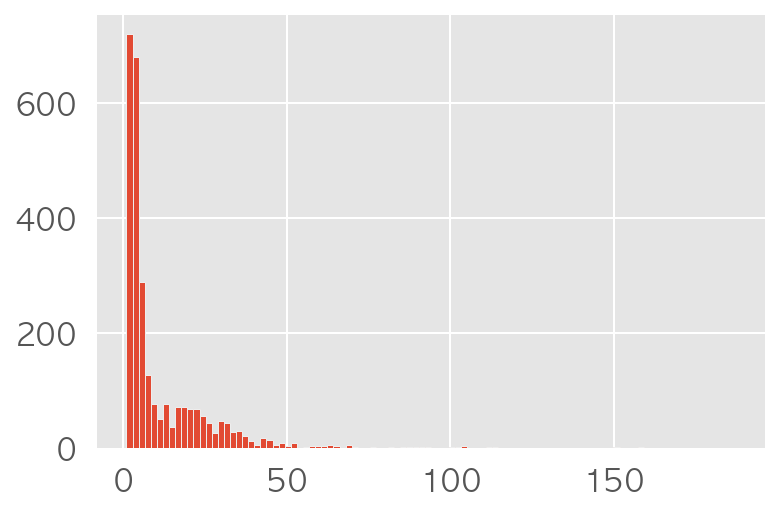

In [651]:
movie_df["actors"].map(lambda x: len(x)).hist(bins=100)

In [652]:
num_of_actor_mean   = movie_df["actors"].map(lambda x: len(x)).mean()
num_of_actor_max    = movie_df["actors"].map(lambda x: len(x)).max()
num_of_actor_median = movie_df["actors"].map(lambda x: len(x)).median()


print(f"평균값: {num_of_actor_mean}")
print(f"최댓값: {num_of_actor_max}")
print(f"중간값: {num_of_actor_median}")

평균값: 12.926725663716814
최댓값: 187
중간값: 5.0


In [653]:
for df_index, data in enumerate(movie_df["actors"]):
    if data == "없음":
        continue
    
    if len(data) <= 5:
        max_iter = len(data)
    else:
        max_iter = 5
    
    for data_index in range(max_iter):
        actor_num = data_index + 1
        movie_df.loc[df_index, f"actorNm_{actor_num}"] = data[data_index]["peopleNm"]

actor_cols = ["actorNm_1", "actorNm_2", "actorNm_3", "actorNm_4", "actorNm_5"]
movie_df   = movie_df.drop(["actors"], axis=1)
movie_df[actor_cols] = movie_df[actor_cols].fillna("없음")

In [654]:
movie_df.head(1)

movieCd            movieNm  audiAcc     salesAcc  showTm prdtStatNm  \
0  20200703  극장판 귀멸의 칼날: 무한열차편  2144756  20600511710 116.000         개봉   

  nations                                          directors  \
0      일본  [{'peopleNm': '소토자키 하루오', 'peopleNmEn': 'Haruo...   

                                            companys    audits  ...   war  \
0  [{'companyCd': '20191941', 'companyNm': '워터홀컴퍼...  15세이상관람가  ... 0.000   

   documentary  history   etc  western  actorNm_1  actorNm_2  actorNm_3  \
0        0.000    0.000 0.000    0.000    하나에 나츠키     키토 아카리     시모노 히로   

   actorNm_4  actorNm_5  
0  마츠오카 요시츠구     히노 사토시  

[1 rows x 39 columns]

### b) actors 평균 누적 관객 수 생성

In [655]:
actorNm_list = []
for i in range(1, 6):
    actorNm_list.append(movie_df[['movieNm','audiAcc',f'actorNm_{i}',"openYear", "openMonth", "openDay"]])
    
    
col_name = ['movieNm','audiAcc','actor',"openYear", "openMonth", "openDay"]
for actor_df in actorNm_list:
    actor_df.columns = col_name
    
actor_df = pd.concat(actorNm_list,ignore_index=True).reset_index(drop=True)
actors = actor_df["actor"].value_counts().index.tolist()

In [656]:
for actor in actors:
    df = actor_df[actor_df["actor"] == actor]
    df = df.sort_values(by=["openYear", "openMonth", "openDay"])
    
    audi_acc_list = []
    
    for df_index, movie_index in enumerate(df.index):
        if actor == "없음":
            actor_df.loc[movie_index, "actor_audiPreAcc"] = 0
            continue
        
        audi_acc = df.loc[movie_index, "audiAcc"]
        
        if df_index == 0:
            actor_df.loc[movie_index, "actor_audiPreAcc"] = 0            
            audi_acc_list.append(audi_acc)
            continue
        
        movie_pre_index = df.index[df_index - 1]
        actor_df.loc[movie_index, "actor_audiPreAcc"]  = np.mean(audi_acc_list)        
        
        audi_acc_list.append(audi_acc)

In [657]:
len_df = len(movie_df)

for i in range(len(movie_df)):
    
    movie_df.loc[i,"actorNm_1_audi_avg"] = actor_df['actor_audiPreAcc'][i]

    movie_df.loc[i,"actorNm_2_audi_avg"] = actor_df['actor_audiPreAcc'][i+len_df]

    movie_df.loc[i,"actorNm_3_audi_avg"] = actor_df['actor_audiPreAcc'][i+len_df*2]

    movie_df.loc[i,"actorNm_4_audi_avg"] = actor_df['actor_audiPreAcc'][i+len_df*3]

    movie_df.loc[i,"actorNm_5_audi_avg"] = actor_df['actor_audiPreAcc'][i+len_df*4]

In [658]:
actor_cols = ["actorNm_1", "actorNm_2", "actorNm_3", "actorNm_4", "actorNm_5"]
check_cols =  [
    "movieNm", "openYear", "openMonth", "audiAcc", "actorNm_1_audi_avg",
    "actorNm_2_audi_avg", "actorNm_3_audi_avg", "actorNm_4_audi_avg", "actorNm_5_audi_avg"
]
check_cols += actor_cols 

# 확인해봅니다.
name = "강동원"

condition_1 = movie_df[check_cols]["actorNm_1"] == name
condition_2 = movie_df[check_cols]["actorNm_2"] == name
condition_3 = movie_df[check_cols]["actorNm_3"] == name
condition_4 = movie_df[check_cols]["actorNm_4"] == name
condition_5 = movie_df[check_cols]["actorNm_5"] == name

condition = condition_1 | condition_2 | condition_3 | condition_4 | condition_5
movie_df.loc[condition, check_cols].sort_values(by=["openYear", "openMonth"])

movieNm  openYear  openMonth  audiAcc  actorNm_1_audi_avg  \
2790   그녀를 믿지 마세요      2004          2   287380               0.000   
2730       늑대의 유혹      2004          7  1246447          287380.000   
2565   형사 Duelist      2005          9   900465          766913.500   
2385  우리들의 행복한 시간      2006          9  2468802          811430.667   
2330       그놈 목소리      2007          2  2913759         1349134.400   
2217            엠      2007         10   403405         1563370.600   
1846          전우치      2009         12  6022691         1370043.000   
1819          의형제      2010          2  5405194         2873580.333   
1710         초능력자      2010         11  2111567               0.000   
1146   군도: 민란의 시대      2014          7  4741281         2435378.529   
1123    두근두근 내 인생      2014          9  1616325          238694.000   
908        검은 사제들      2015         11  5437772         3131506.059   
870          검사외전      2016          2  9664799         3098561.286   
731        가려진 시간      2016         11   506877         3324606.692   
709           마스터      2016         12  7133595         2295224.933   
518         골든슬럼버      2018          2  1327592         3390690.600   
433            인랑      2018          7   891308         3261746.938   
88             반도      2020          7  3810397         3122309.353   

      actorNm_2_audi_avg  actorNm_3_audi_avg  actorNm_4_audi_avg  \
2790               0.000               0.000           52852.500   
2730               0.000               0.000               0.000   
2565         1258875.000          465009.667               0.000   
2385          518365.000               0.000          600672.444   
2330               0.000         1105302.000         1225773.500   
2217          535371.000          759471.667               0.000   
1846          796833.200         1936660.857         2570620.091   
1819         2034707.000               0.000               0.000   
1710         2456017.875          584733.000               0.000   
1146         2417745.556               0.000          643574.000   
1123          408727.000         2650099.100               0.000   
908          2556119.636          344923.000          294319.000   
870          2796257.333         1305602.143         1010209.300   
731                0.000               0.000         2598021.000   
709          3123340.286         2834259.667         1140260.917   
518          2060476.667         3186744.625         1581548.083   
433          2980172.111               0.000         2027994.714   
88            746692.000          801121.500          715540.333   

      actorNm_5_audi_avg actorNm_1 actorNm_2 actorNm_3 actorNm_4 actorNm_5  
2790           49463.000       강동원       김용선        진경       김지영       김하늘  
2730               0.000       강동원       이청아       조한선       이명수       정혜영  
2565               0.000       강동원       안성기       하지원        장민       함성원  
2385          751846.000       강동원       이나영       윤여정       김지영       최정우  
2330               0.000       설경구       김남주       김영철       강동원       송영창  
2217               0.000       강동원       이연희       공효진       채호기       이세련  
1846          500038.400       강동원       임수정       김윤석       유해진       염정아  
1819               0.000       송강호       강동원       전국환       박혁권       윤희석  
1710               0.000       김한나       강동원        고수       정은채       윤다경  
1146         1818953.375       하정우       강동원       최귀화       이성민       조진웅  
1123          165686.667       김승욱       송혜교       강동원       조성목       백일섭  
908           622214.250       김윤석       강동원       박소담       김병옥       김의성  
870          1277753.350       황정민       강동원       이성민       박성웅       김응수  
731          1194450.000       강동원       신은수       이효제       김희원       권해효  
709                0.000       이병헌       강동원       김우빈       엄지원       박해수  
518          1618755.500       강동원       김의성       한효주       김성균       김대명  
433          2646747.714       강동원       한효주       김지아    

In [659]:
actor_audi_avg_cols = [
    'actorNm_1_audi_avg', 'actorNm_2_audi_avg',
    'actorNm_3_audi_avg', 'actorNm_4_audi_avg',
    'actorNm_5_audi_avg'
]
for i in range(len(movie_df)):
    audi_avgs = movie_df.loc[i, actor_audi_avg_cols].values
    
    top_actor_num = 0
    for audi_avg in audi_avgs:
        if audi_avg >= 500000:
            top_actor_num += 1
    
    movie_df.loc[i, "top_actor_num"] = top_actor_num

## 9) directors 전처리

### a) director 뽑기

In [660]:
def get_peopleNm(x):
    if x == "없음":
        return x
    data = x[0]
    return data["peopleNm"]

movie_df["directors"] = movie_df["directors"].apply(get_peopleNm)

### b) 감독의 평균 누적관객수 생성

In [661]:
directors = movie_df["directors"].value_counts().index.tolist()

for director in directors:
    df = movie_df[movie_df["directors"] == director]
    df = df.sort_values(by=["openYear", "openMonth", "openDay"])
    
    audi_acc_list  = []
    sales_acc_list = []
    for df_index, movie_index in enumerate(df.index):
        if director == "없음":
            movie_df.loc[movie_index, "director_audiPreAcc"]  = 0
            movie_df.loc[movie_index, "director_salesPreAcc"] = 0
            continue
        
        audi_acc  = df.loc[movie_index, "audiAcc"]
        sales_acc = df.loc[movie_index, "salesAcc"]
        
        if df_index == 0:
            movie_df.loc[movie_index, "director_audiPreAcc"]  = 0
            movie_df.loc[movie_index, "director_salesPreAcc"] = 0
            
            audi_acc_list.append(audi_acc)
            sales_acc_list.append(sales_acc)
            continue
        
        movie_pre_index = df.index[df_index - 1]
        movie_df.loc[movie_index, "director_audiPreAcc"]  = np.mean(audi_acc_list)
        movie_df.loc[movie_index, "director_salesPreAcc"] = np.mean(sales_acc_list)
        
        audi_acc_list.append(audi_acc)
        sales_acc_list.append(sales_acc)

## 10) companys 전처리

In [662]:
part_types = []
for i in range(len(movie_df)):
    company_info = movie_df.loc[i, "companys"]
    
    for data in company_info:
        part_name = data["companyPartNm"]
        part_types.append(part_name)

In [663]:
part_type_names = list(set(part_types))

part_type_dict = {}
for part_type_name in part_type_names:
    part_type_dict[part_type_name] = part_types.count(part_type_name)
    
def f1(x):
    return x[1]

sorted(part_type_dict.items(), key=f1, reverse=True)

[('배급사', 3091),
 ('제작사', 2083),
 ('수입사', 1912),
 ('제공', 987),
 ('공동제공', 934),
 ('해외세일즈사', 892),
 ('제작서비스-사운드', 158),
 ('제작서비스-현상', 142),
 ('제작서비스-시각효과/특수효과', 118),
 ('제작서비스-로케이션', 113),
 ('제작서비스-편집', 42),
 ('제작서비스-세트', 39),
 ('제작서비스-음악', 23),
 ('저작권관련사', 21),
 ('제작서비스-후반작업(VFX)', 21),
 ('프로덕션 서비스', 21),
 ('홍보사', 15),
 ('제작서비스-분장/헤어', 14),
 ('제작서비스-무술', 11),
 ('제작서비스-미술', 11),
 ('제작서비스-촬영', 11),
 ('영상위원회', 9),
 ('제작서비스-3D 컨버전', 9),
 ('제작서비스-기획', 7),
 ('기타', 3),
 ('소속사', 1),
 ('직배사', 1),
 ('제작서비스-소품/의상', 1)]

- <div style="font-size:15px">최빈값을 기준으로 값이 뚝 떨어지는 구간이 해외세일즈사입니다. <br>
따라서, 해외세일즈사를 포함한 총 6개의 값만 가져오도록 하겠습니다.</div>

In [664]:
part_type = {
    "배급사": "distribution",
    "제작사": "production",
    "수입사": "importer",
    "제공": "supplier",
    "공동제공": "joint venture",
    "해외세일즈사": "overseas sales",
}
for df_index, company_data in enumerate(movie_df["companys"]):
    if company_data == "없음":
        continue
    
    company_parts = []
    for data in company_data:
        part_name     = data["companyPartNm"]
        
        if part_name not in part_type.keys():
            continue
        part_eng_name = part_type[part_name]
        
        # 중복을 피합니다.
        if part_name in company_parts:
            continue
            
        
        movie_df.loc[df_index, "companyCd"]        = data["companyCd"]
        movie_df.loc[df_index, f"{part_eng_name}"] = data["companyNm"]
        
        company_parts.append(part_name)

In [665]:
# 결측치를 확인합니다.
company_cols = ["distribution", "importer", "production", "supplier", "overseas sales", "joint venture"]
movie_df[company_cols].isnull().sum()

distribution         9
importer          1045
production        1353
supplier          1962
overseas sales    1941
joint venture     2436
dtype: int64

In [666]:
# 결측치 값을 "없음"으로 대체하고
# 기존 companys 열은 drop 합니다.
movie_df[company_cols] = movie_df[company_cols].fillna("없음")
movie_df = movie_df.drop(["companys"], axis=1)

In [667]:
movie_df.head(1)

movieCd            movieNm  audiAcc     salesAcc  showTm prdtStatNm  \
0  20200703  극장판 귀멸의 칼날: 무한열차편  2144756  20600511710 116.000         개봉   

  nations directors    audits  openYear  ...  top_actor_num  \
0      일본  소토자키 하루오  15세이상관람가      2021  ...          0.000   

   director_audiPreAcc director_salesPreAcc  companyCd  distribution  \
0                0.000                0.000   20186501     워터홀컴퍼니(주)   

       importer  production  supplier  overseas sales  joint venture  
0  에스엠지홀딩스 주식회사          없음        없음              없음             없음  

[1 rows x 53 columns]

# 4. EDA

## 1) 날짜별 분석

In [668]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.title("audiAcc by year")

sns.barplot(x=movie_df["openYear"], y=movie_df["audiAcc"], ci=None)

<AxesSubplot:title={'center':'audiAcc by year'}, xlabel='openYear', ylabel='audiAcc'>

- 연도별 평균 누적 관객 수의 차이가 큽니다. 20, 21년도에 갑자기 줄어든 것을 보아 코로나가 원인임을 짐작할 수 있습니다. <br>
이렇게 변수 하나에 크게 흔들리게 되면 예측과 분류가 자연스레 불안정해지기 때문에, <br>
- **코로나 이전과 이후의 차이를 가중치를 통해 맞춰주도록 하겠습니다.**

In [669]:
# 03년도 미만인 데이터 개수
len(movie_df[movie_df["openYear"] < 2004])

37

-----
> 코로나로 인한 영화매출 약 70퍼 감소
https://www.hani.co.kr/arti/culture/culture_general/944574.html

<span style="font-size: 20px"> kofic(영화진흥위원회) 전산 구축망에 관련 글 </span>
> 2001년 영화진흥위원회가 문화체육관광부로부터 사업을 이관 받아 영화계의 의견 수렴을 거쳐 **2003년 시스템을 구축하였으며**, 이후 영화상영관의 꾸준한 전산망 가입이 이어져 현재 전산화된 영화관 기준으로 전국 영화관의 스크린 연동률은 99%에 이르고 있습니다. (2010년에 의무화 법안 통과) https://www.kobis.or.kr/kobis/business/comm/comm/openStatute.do 
----

### a) 03년도 이전 데이터 drop

In [670]:
movie_df = movie_df.drop(movie_df[movie_df["openYear"] <= 2003].index, axis=0).reset_index(drop=True)

### b) 가중치를 통한 관객 수 조정

평균 누적 관객수(y)가 일정하게 100을 가지고 있다는 것을 식을 나타내면 <br>
$$ y = 100 $$이 됩니다. <br>
여기서, 어떤 한 요인(코로나) w에 대해 y값이 변동하여 10이 되었다고 치자. 그럼 아래와 같은 식이 될 것입니다. <br>
$$ 10 = 100 * w $$ <br>
따라서, 코로나 요인이 미치는 가중치 $w = 0.1$이 됩니다. <br>
위와 같은 개념으로, corona weight를 구해보겠습니다.

In [671]:
before_corona_audi = movie_df[(movie_df["openYear"] < 2020) & (movie_df["openYear"] >= 2010)]["audiAcc"].mean()
after_corona_audi  = movie_df[movie_df["openYear"] >= 2020]["audiAcc"].mean()

corona_weight = before_corona_audi / after_corona_audi
corona_weight

3.0225985876589134

In [672]:
# corona weight로 관객 수 조정
corona_year_movie_df = movie_df[movie_df["openYear"] >= 2020]
movie_df.loc[corona_year_movie_df.index, "audiAcc"] = corona_year_movie_df["audiAcc"] * corona_weight

<AxesSubplot:title={'center':'audiAcc by year'}, xlabel='openYear', ylabel='audiAcc'>

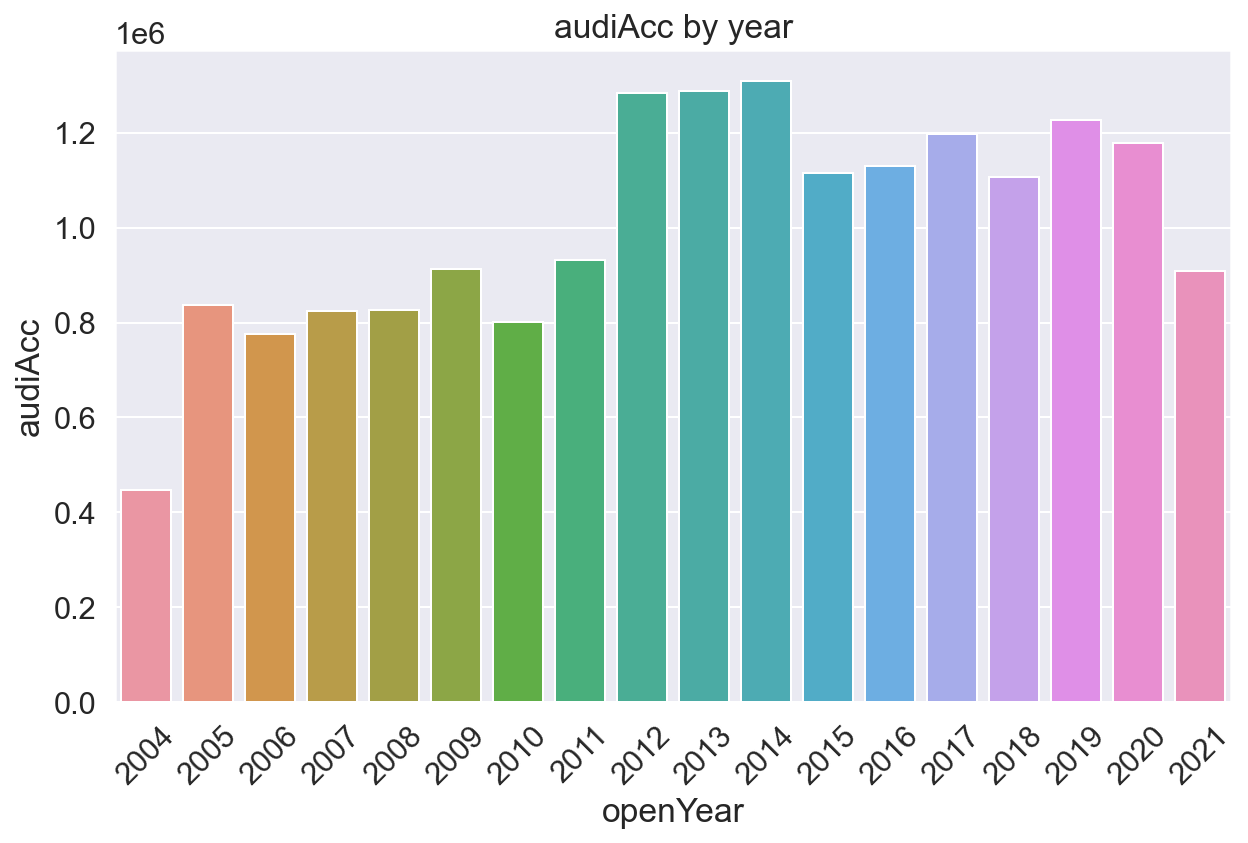

In [673]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.title("audiAcc by year")

sns.barplot(x=movie_df["openYear"], y=movie_df["audiAcc"], ci=None)

<AxesSubplot:xlabel='openMonth', ylabel='audiAcc'>

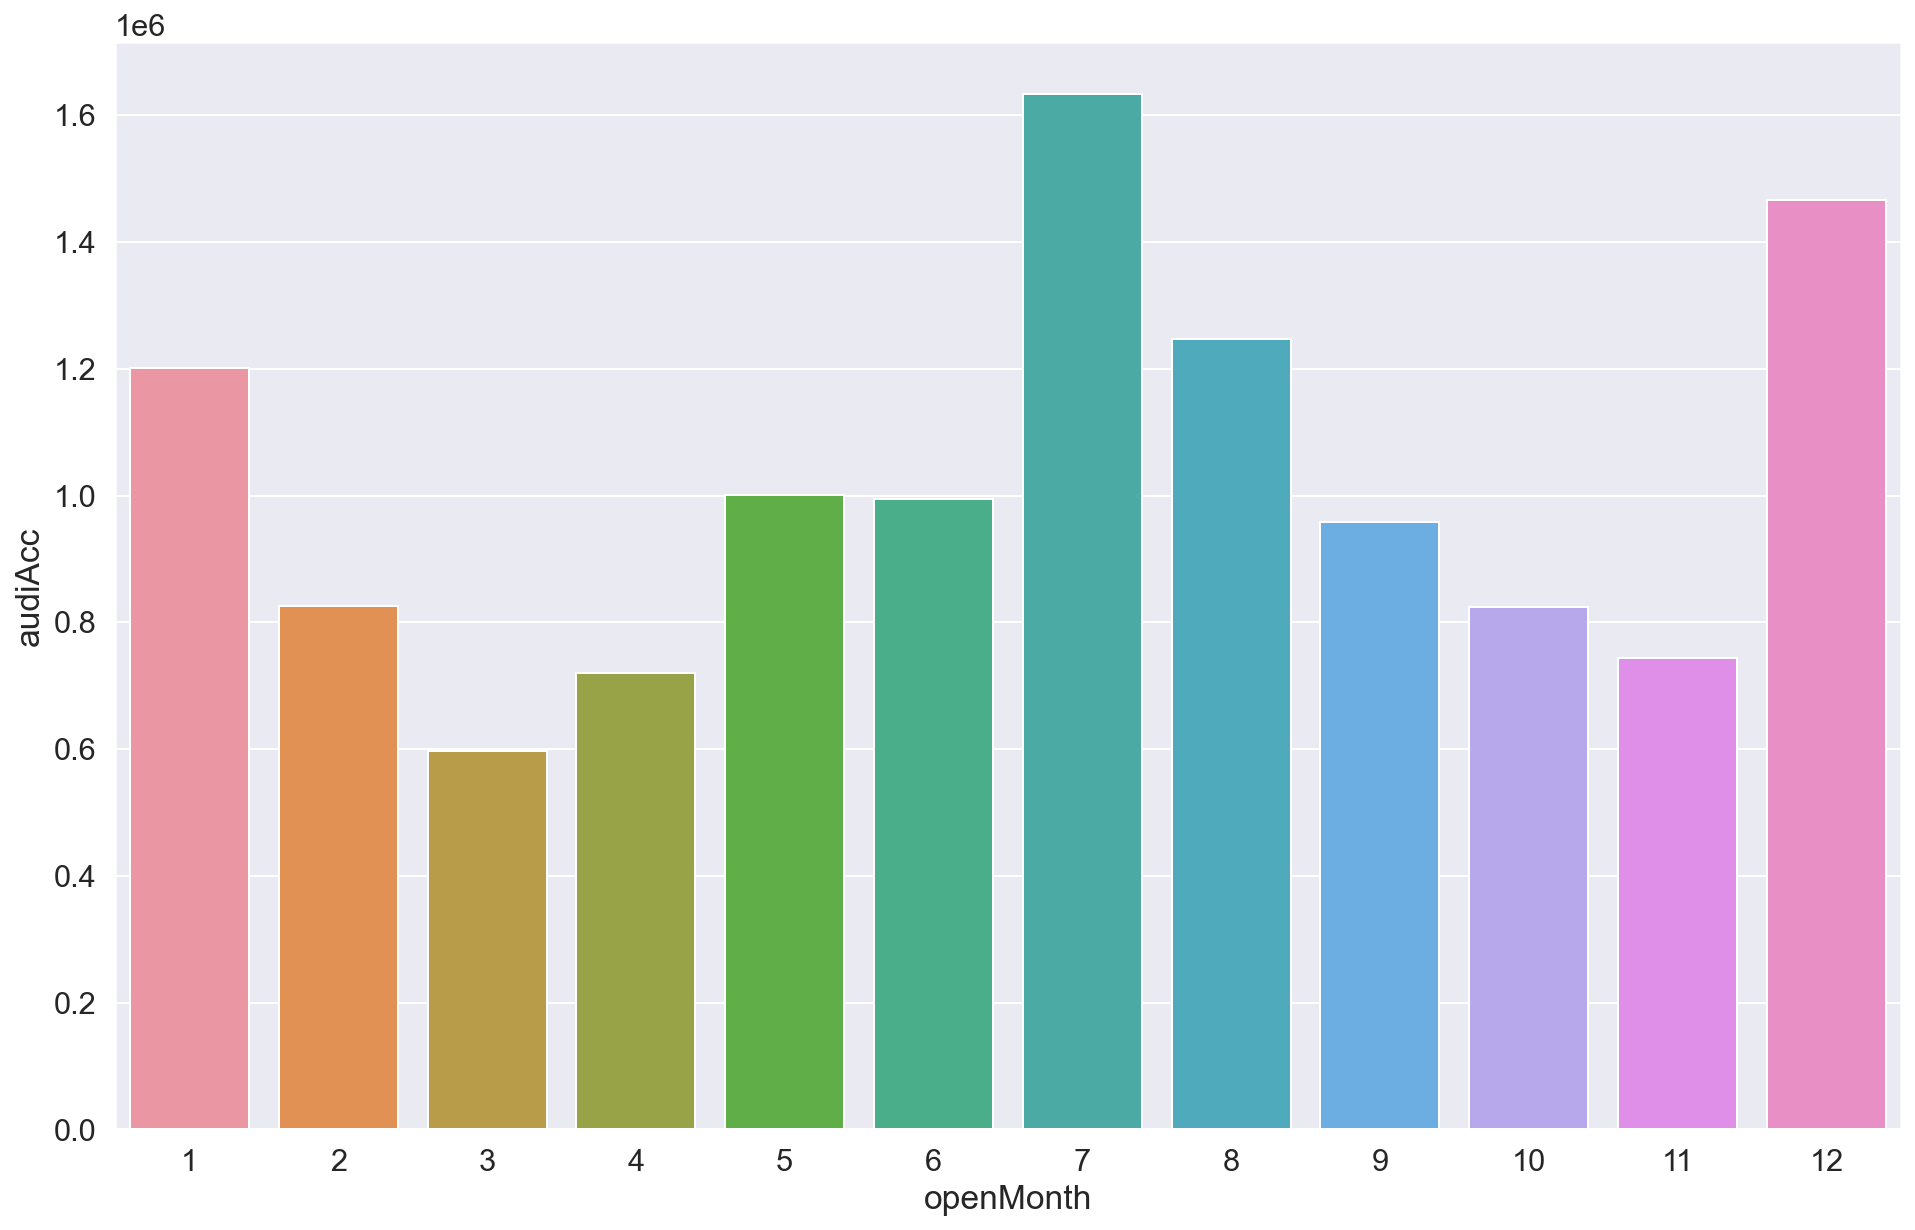

In [674]:
plt.figure(figsize=(16,10))
sns.barplot(x=movie_df["openMonth"], y=movie_df["audiAcc"], ci=None)

- <div style = "font-size: 16px;"> 대체로 성수기에 포함되는 달이 관객수가 많음을 확인할 수 있습니다. <br/>
특히 7월달에 관객수가 많으며 3월달에는 관객수가 7월에 비해 2배 정도 낮음을 확인할 수 있습니다.</div>

<AxesSubplot:xlabel='openDay', ylabel='audiAcc'>

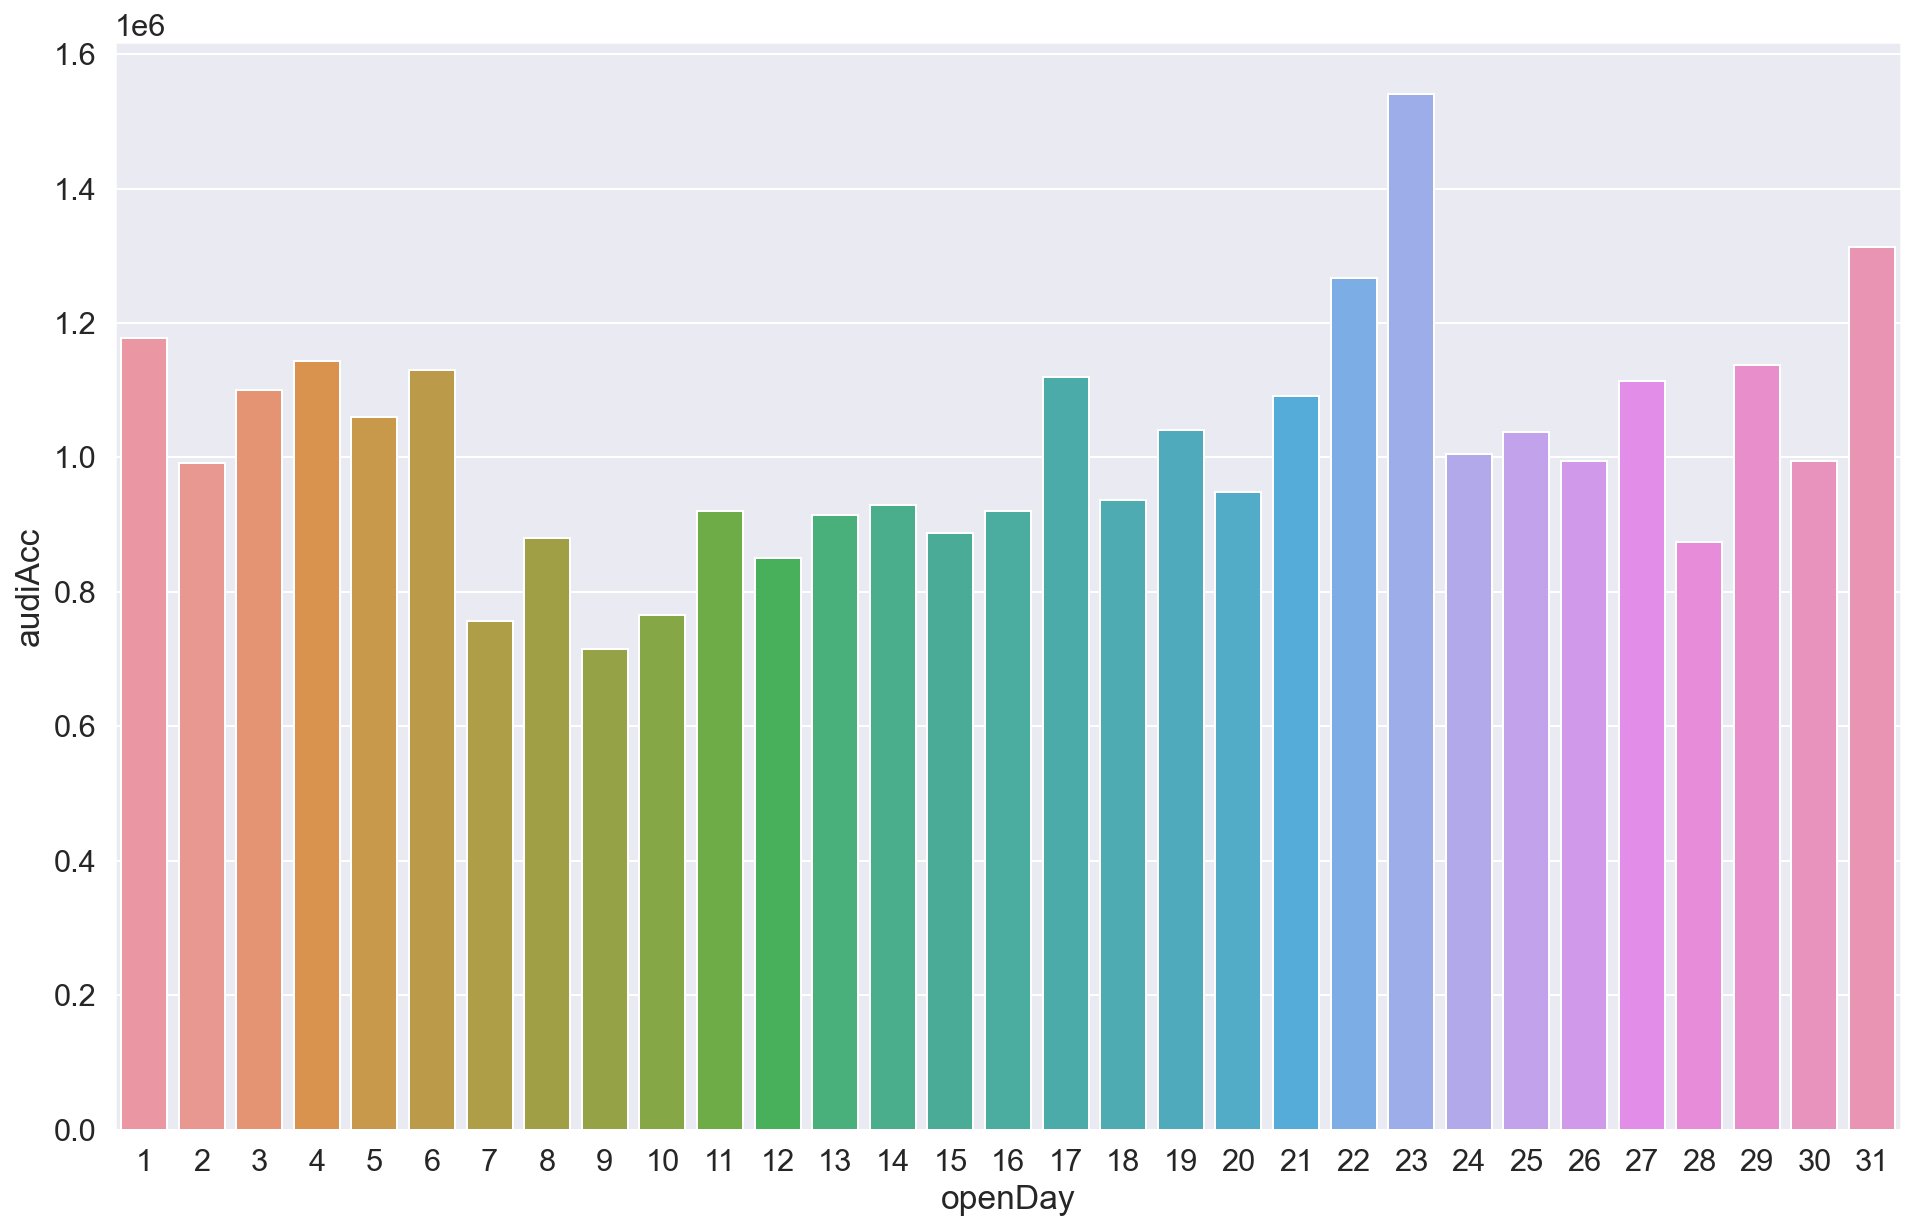

In [675]:
plt.figure(figsize=(16,10))
sns.barplot(x=movie_df["openDay"], y=movie_df["audiAcc"], ci=None)

## 2) 어느 대륙의 영화가 인기가 많을까?

In [676]:
america = ['미국', '캐나다','멕시코', '아르헨티나', '브라질','페루']
asia    = ['한국', '일본', '중국', '홍콩', '인도', '태국', '대만']
eroupe  = ['영국', '프랑스', '독일', '스페인', '러시아', '이탈리아', '벨기에', '아일랜드', '네덜란드', '스웨덴', '덴마크', '핀란드', '아이슬란드', '우크라이나', '노르웨이','폴란드','터키' ]
oceania = ['호주', '뉴질랜드']
etc     = ['기타', "남아프리카공화국"]

for continent in range(len(movie_df)):
    if movie_df['nations'][continent] in america:
        movie_df.loc[continent, 'continent'] = 'america'
    elif movie_df['nations'][continent] in asia:
        movie_df.loc[continent, 'continent'] = 'asia'
    elif movie_df['nations'][continent] in eroupe:
        movie_df.loc[continent, 'continent'] = 'eroupe'
    elif movie_df['nations'][continent] in oceania:
        movie_df.loc[continent, 'continent'] = 'oceania'
    else:
        movie_df.loc[continent, 'continent'] = 'etc'

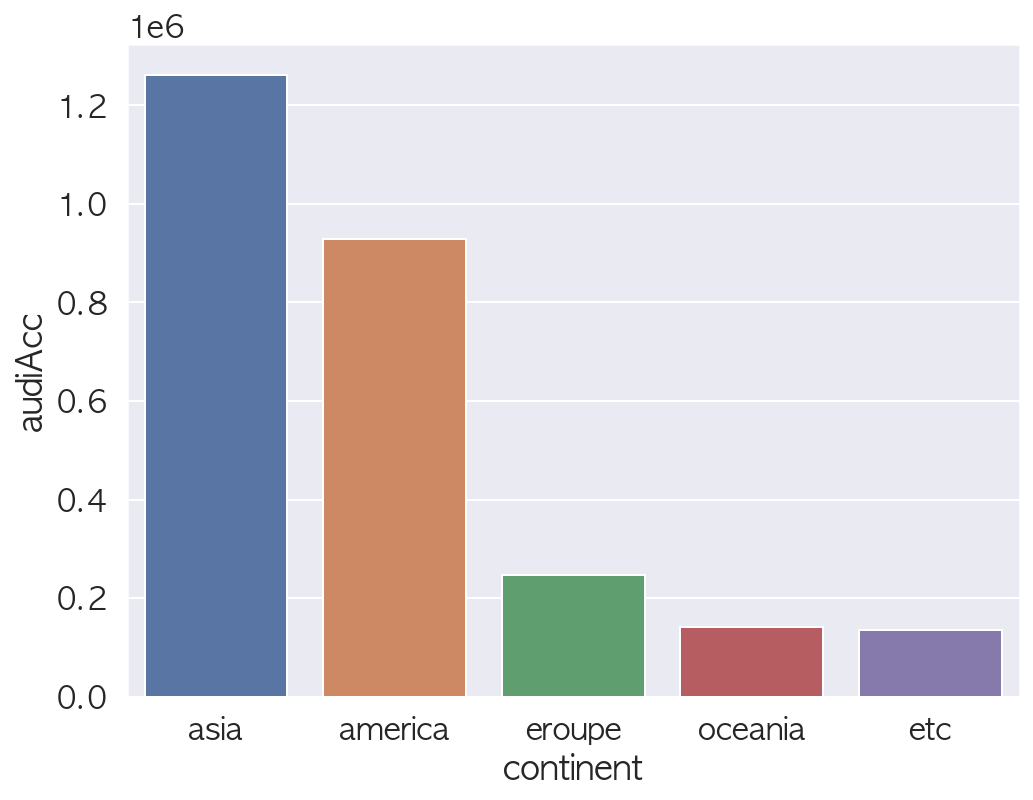

In [677]:
plt.rc("font", family="AppleGothic")
plt.figure(figsize=(8, 6))
g = sns.barplot(x=movie_df["continent"], y=movie_df["audiAcc"], ci=None, order=['asia','america', 'eroupe','oceania','etc'])

In [678]:
movie_df["nations"].value_counts()

미국      1238
한국      1006
일본       176
영국        79
프랑스       68
중국        41
기타        35
독일        31
홍콩        26
스페인       22
러시아       12
이탈리아      10
호주        10
캐나다        8
벨기에        7
태국         7
대만         6
인도         6
Name: nations, dtype: int64

- **<div style = "font-size: 16px;">asia와 america가 압도적으로 높습니다. 현재 데이터는 kofic 한국 영화진흥위원회에서 가져온 데이터기 때문에 
영화 접근성이 좋은 나라들이 데이터가 많은 것을 알 수 있습니다. 따라서 편향이 심한 결과라고 볼 수 있습니다.</div>**

## 3) 상영등급별 영화 분석

### a) 상영등급별 영화 평균 상영시간이 다를까?

<AxesSubplot:xlabel='audits', ylabel='showTm'>

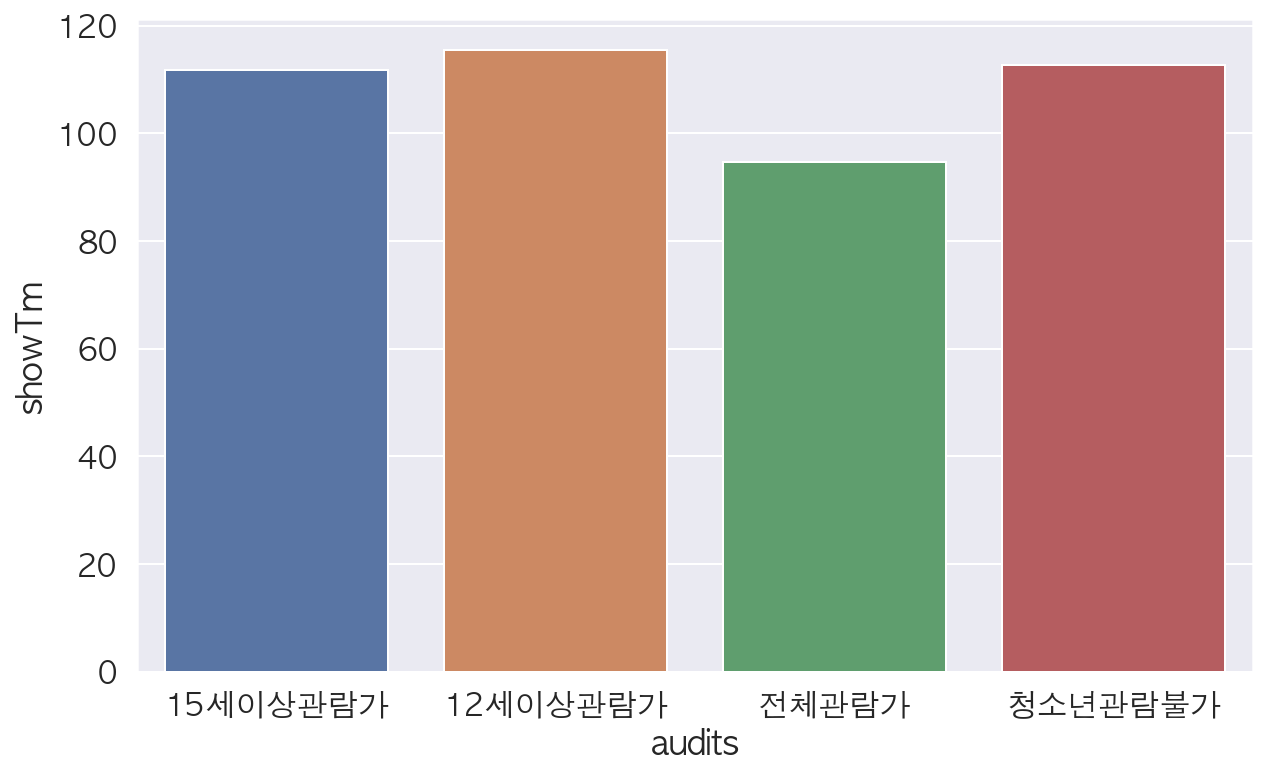

In [679]:
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_df["audits"], y=movie_df["showTm"], ci=None)

### b) 상영등급별 영화 관객 수가 다를까?

In [806]:
plt.figure(figsize=(10, 6))
index_order = ["전체관람가", "12세이상관람가", "15세이상관람가", "청소년관람불가"]
sns.barplot(
    x=movie_df["audits"],
    y=movie_df["audiAcc"],
    order=index_order,
    ci=None).set_title("상영등급별 평균 관객 수")

Text(0.5, 1.0, '상영등급별 평균 관객 수')

In [797]:
movie_df["audits"].unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '청소년관람불가'], dtype=object)

In [803]:
for genre in genre_cols:
    print(genre)
    for audit in movie_df["audits"].unique():
        audit_condition = movie_df["audits"] == audit
        genre_condition = movie_df[genre] == 1
    
        print(movie_df[audit_condition & genre_condition]["audiAcc"].mean())
    print()

animation
802101.4713801548
276681.89920868876
561545.4263278373
96698.0

action
1638070.9016822288
2010574.4977518388
973614.750208949
899644.6099884738

show
33104.0
39324.007625442464
291679.07255340694
nan

fantasy
717572.4031717143
2061176.2981171473
872642.6879016411
350358.1538461539

thriller
868165.3236882633
1209403.4792541221
211233.0
580291.6265178268

comedy
990773.8197175877
1160462.7597212896
806730.8712641932
625321.3377895403

drama
1205308.086301063
1237905.6950997983
600495.4046263457
717128.0679278931

adventure
1362482.8126061389
2206318.1743289595
757588.3812657653
935814.3333333334

criminal
1528507.6238582202
1080878.588169129
599162.0
911349.6954133688

mystery
866877.176267699
1140432.380952381
1997197.5
416896.0625

family
755105.5
1194136.716675647
757639.498152575
nan

documentary
174897.25
491425.8336450475
607553.4872466499
nan

romance
599979.8063950539
694892.3185458784
760281.7851749829
616308.5142857142

horror
482438.66832220514
551544.3333333334
211

### c) 상영등급별 인기 있는 장르가 무엇일까?

#### 전체 관람가

- 전체 관람가는 확실히 가벼운 분위기나 요소에 집중된 장르가 많은 걸 알 수 있습니다.

In [681]:
print(audit_all_df[audit_all_df["adventure"] == 1]["audiAcc"].mean())
print(audit_12_df[audit_12_df["adventure"] == 1]["audiAcc"].mean())
print(audit_19_df[audit_19_df["adventure"] == 1]["audiAcc"].mean())

757588.3812657653
2206318.1743289595
935814.3333333334


In [682]:
audit_all_df = movie_df[movie_df["audits"] == "전체관람가"]
audit_all_df[genre_cols].sum().sort_values(ascending=False)[:10]

animation     380.000
adventure     200.000
family        149.000
comedy        144.000
fantasy        96.000
drama          94.000
action         57.000
SF             27.000
documentary    16.000
romance        16.000
dtype: float64

<AxesSubplot:>

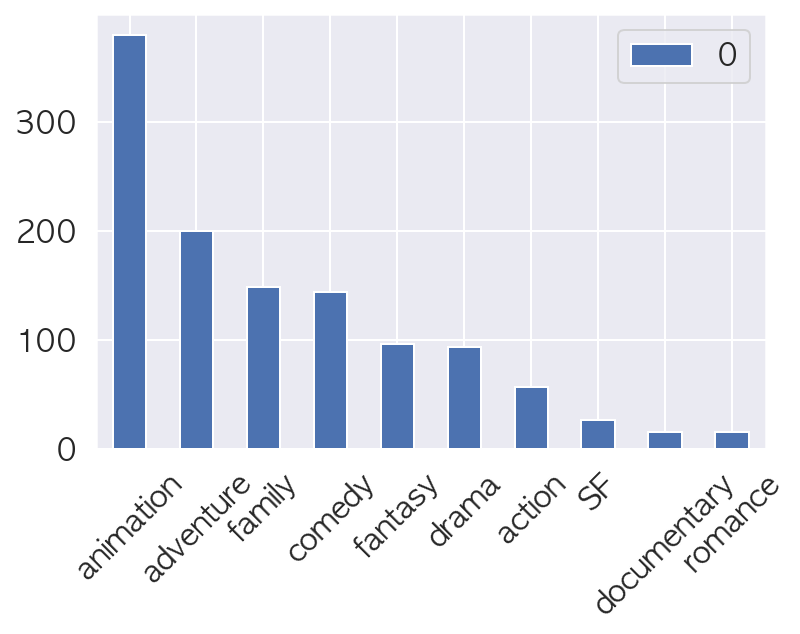

In [683]:
audit_all_df[genre_cols].sum().sort_values(ascending=False)[:10].to_frame().plot(kind="bar", rot=45)

#### 12세 이상 관람가
- 전체 관람가보다 장르의 분위기가 조금은 달라진 모습을 볼 수 있습니다.

In [684]:
audit_12_df = movie_df[movie_df["audits"] == "12세이상관람가"]
audit_12_df[genre_cols].sum().sort_values(ascending=False)[:10]

drama       333.000
action      241.000
comedy      161.000
adventure   135.000
SF          126.000
romance     119.000
fantasy      88.000
thriller     62.000
animation    33.000
criminal     27.000
dtype: float64

<AxesSubplot:>

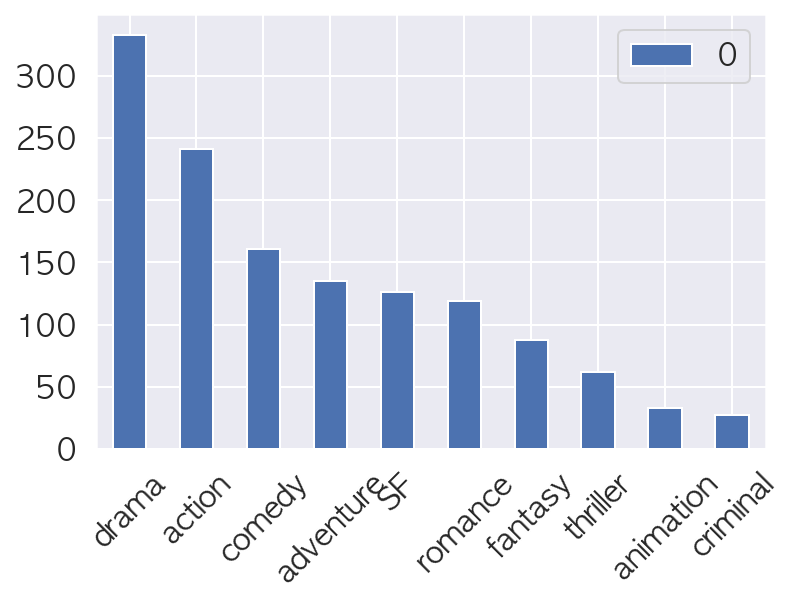

In [685]:
audit_12_df[genre_cols].sum().sort_values(ascending=False)[:10].to_frame().plot(kind="bar", rot=45)

#### 15세 이상 관람가

In [686]:
audit_15_df = movie_df[movie_df["audits"] == "15세이상관람가"]
audit_15_df[genre_cols].sum().sort_values(ascending=False)[:10]

drama      413.000
action     313.000
thriller   255.000
comedy     244.000
romance    173.000
horror     126.000
criminal   122.000
mystery     79.000
SF          58.000
fantasy     51.000
dtype: float64

<AxesSubplot:>

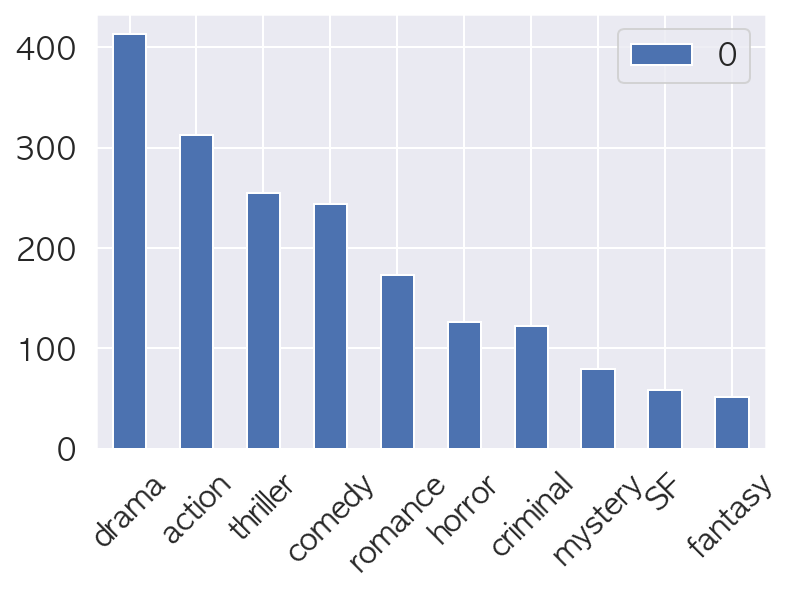

In [687]:
audit_15_df[genre_cols].sum().sort_values(ascending=False)[:10].to_frame().plot(kind="bar", rot=45)

#### 청소년 관람불가

In [688]:
audit_19_df = movie_df[movie_df["audits"] == "청소년관람불가"]
audit_15_df[genre_cols].sum().sort_values(ascending=False)

drama         413.000
action        313.000
thriller      255.000
comedy        244.000
romance       173.000
horror        126.000
criminal      122.000
mystery        79.000
SF             58.000
fantasy        51.000
adventure      47.000
history        33.000
war            32.000
animation      11.000
documentary     8.000
family          6.000
musical         4.000
western         2.000
etc             2.000
show            1.000
dtype: float64

<AxesSubplot:>

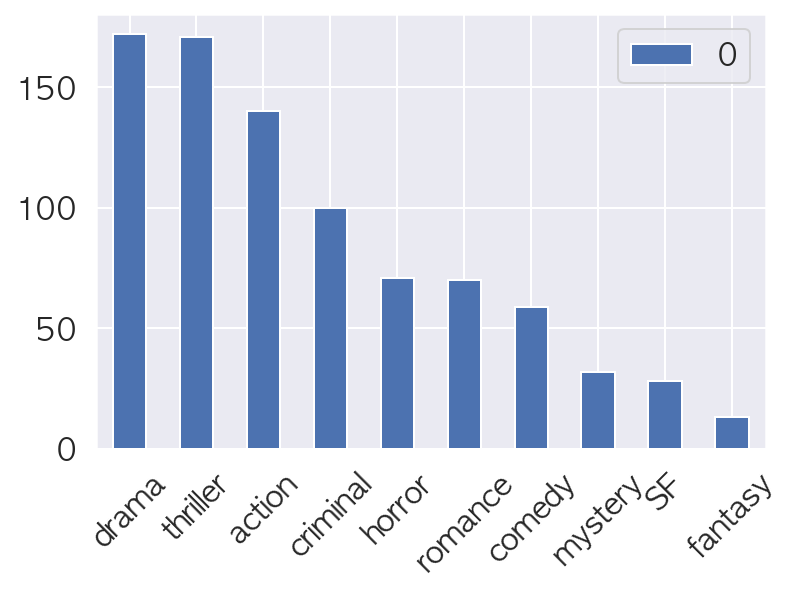

In [689]:
audit_19_df[genre_cols].sum().sort_values(ascending=False)[:10].to_frame().plot(kind="bar", rot=45)

- 관람 등급에 따른 장르 차이가 심할거라 생각한 장르로, 범죄물과 스릴러로 잡고 살펴봤습니다. <br>
12세 이상 관람가의 범죄물 영화 평균 관객 수가 19세 이상보다 많은 것을 알 수 있습니다. <br>

범죄물 및 스릴러의 작품 개수는 19세 이상 관람등급이 훨씬 많습니다만, 비교적 평균 관객이 적습니다. <br>
따라서, 19세 이상 영화들의 색깔이 짙은 것을 추정 할 수 있습니다.

In [690]:
audit_12_df["animation"]

1      0.000
3      0.000
10     0.000
11     0.000
13     0.000
        ... 
2764   0.000
2765   0.000
2768   0.000
2782   0.000
2787   0.000
Name: animation, Length: 726, dtype: float64

In [691]:
criminal_12 = int(audit_12_df[audit_12_df["criminal"] == 1]["audiAcc"].mean())
criminal_15 = int(audit_15_df[audit_15_df["criminal"] == 1]["audiAcc"].mean())
criminal_19 = int(audit_19_df[audit_19_df["criminal"] == 1]["audiAcc"].mean())

thriller_12 = int(audit_12_df[audit_12_df["thriller"] == 1]["audiAcc"].mean())
thriller_15 = int(audit_15_df[audit_15_df["thriller"] == 1]["audiAcc"].mean())
thriller_19 = int(audit_19_df[audit_19_df["thriller"] == 1]["audiAcc"].mean())

animation_12 = int(audit_12_df[audit_12_df["animation"] == 1]["audiAcc"].mean())
animation_15 = int(audit_15_df[audit_15_df["animation"] == 1]["audiAcc"].mean())
animation_19 = int(audit_19_df[audit_19_df["animation"] == 1]["audiAcc"].mean())

In [692]:
print(f'12세 이상 관람가의 범죄물 영화 평균 관객 수: {int(audit_12_df[audit_12_df["criminal"] == 1]["audiAcc"].mean())}')
print(f'12세 이상 관람가의 스릴러 영화 평균 관객 수: {int(audit_12_df[audit_12_df["thriller"] == 1]["audiAcc"].mean())}')
print()
print(f'15세 이상 관람가의 범죄물 영화 평균 관객 수: {int(audit_15_df[audit_15_df["criminal"] == 1]["audiAcc"].mean())}')
print(f'15세 이상 관람가의 스릴러 영화 평균 관객 수: {int(audit_15_df[audit_15_df["thriller"] == 1]["audiAcc"].mean())}')
print()
print(f'19세 이상 관람가의 범죄물 영화 평균 관객 수: {int(audit_19_df[audit_19_df["criminal"] == 1]["audiAcc"].mean())}')
print(f'19세 이상 관람가의 스릴러 영화 평균 관객 수: {int(audit_19_df[audit_19_df["thriller"] == 1]["audiAcc"].mean())}')

12세 이상 관람가의 범죄물 영화 평균 관객 수: 1080878
12세 이상 관람가의 스릴러 영화 평균 관객 수: 1209403

15세 이상 관람가의 범죄물 영화 평균 관객 수: 1528507
15세 이상 관람가의 스릴러 영화 평균 관객 수: 868165

19세 이상 관람가의 범죄물 영화 평균 관객 수: 911349
19세 이상 관람가의 스릴러 영화 평균 관객 수: 580291


In [693]:
print(f'12세 이상 관람가의 애니메이션 영화 평균 관객 수: {int(audit_12_df[audit_12_df["animation"] == 1]["audiAcc"].mean())}')
print(f'12세 이상 관람가의 어드벤쳐 영화 평균 관객 수: {int(audit_12_df[audit_12_df["adventure"] == 1]["audiAcc"].mean())}')
print()
print(f'15세 이상 관람가의 애니메이션 영화 평균 관객 수: {int(audit_15_df[audit_15_df["animation"] == 1]["audiAcc"].mean())}')
print(f'15세 이상 관람가의 어드벤쳐 영화 평균 관객 수: {int(audit_15_df[audit_15_df["adventure"] == 1]["audiAcc"].mean())}')
print()
print(f'19세 이상 관람가의 애니메이션 영화 평균 관객 수: {int(audit_19_df[audit_19_df["animation"] == 1]["audiAcc"].mean())}')
print(f'19세 이상 관람가의 어드벤쳐 영화 평균 관객 수: {int(audit_19_df[audit_19_df["adventure"] == 1]["audiAcc"].mean())}')

12세 이상 관람가의 애니메이션 영화 평균 관객 수: 276681
12세 이상 관람가의 어드벤쳐 영화 평균 관객 수: 2206318

15세 이상 관람가의 애니메이션 영화 평균 관객 수: 802101
15세 이상 관람가의 어드벤쳐 영화 평균 관객 수: 1362482

19세 이상 관람가의 애니메이션 영화 평균 관객 수: 96698
19세 이상 관람가의 어드벤쳐 영화 평균 관객 수: 935814


<AxesSubplot:title={'center':'상영등급별 범죄물 평균 누적관객 수'}>

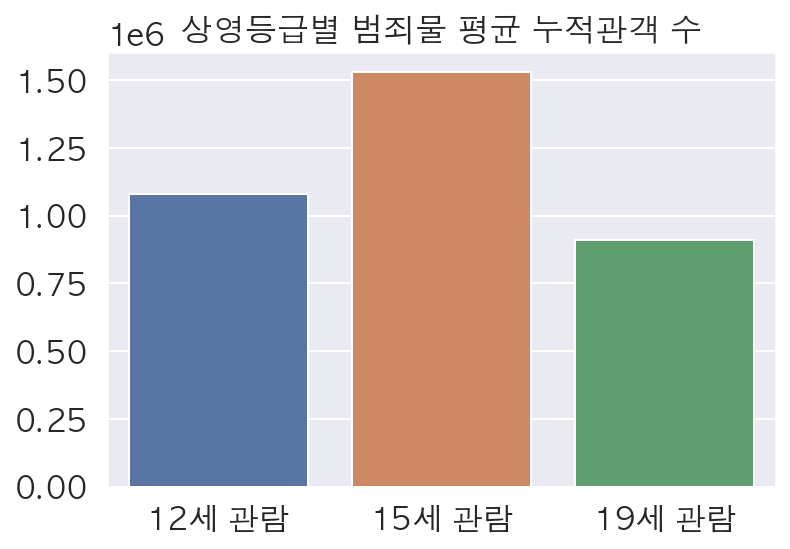

In [694]:
plt.title("상영등급별 범죄물 평균 누적관객 수", fontdict={"fontsize": 16})
sns.barplot(
    x=pd.Series(["12세 관람", "15세 관람", "19세 관람"]),
    y=pd.Series([criminal_12, criminal_15, criminal_19])
)

<AxesSubplot:title={'center':'상영등급별 스릴러 평균 누적관객 수'}>

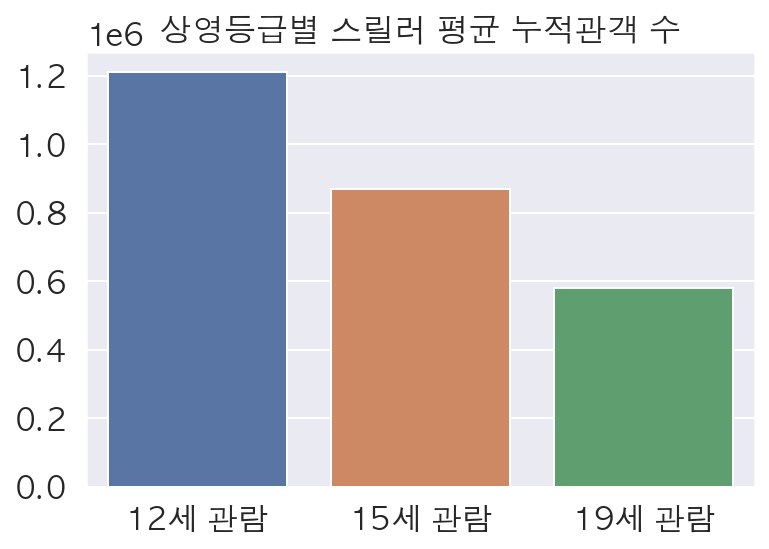

In [695]:
plt.title("상영등급별 스릴러 평균 누적관객 수", fontdict={"fontsize": 16})
sns.barplot(
    x=pd.Series(["12세 관람", "15세 관람", "19세 관람"]),
    y=pd.Series([thriller_12, thriller_15, thriller_19])
)

<AxesSubplot:title={'center':'상영등급별 애니메이션 평균 누적관객 수'}>

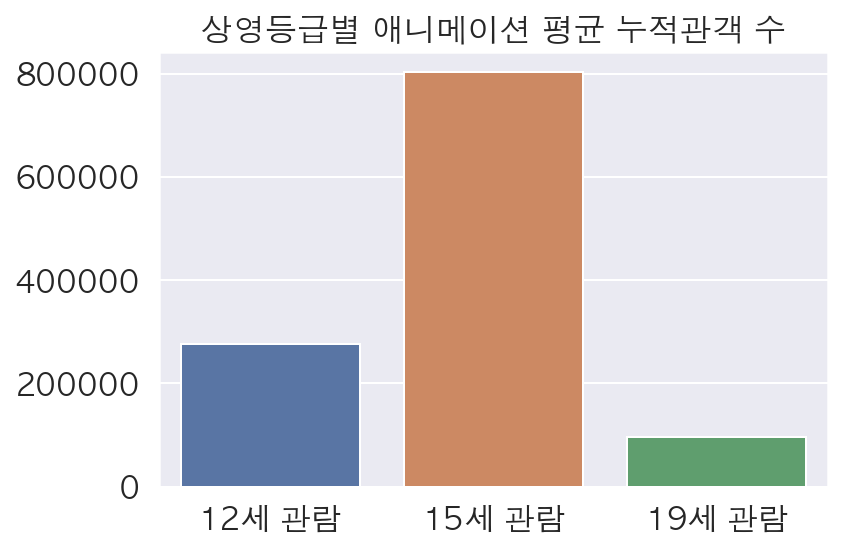

In [696]:
plt.title("상영등급별 애니메이션 평균 누적관객 수", fontdict={"fontsize": 16})
sns.barplot(
    x=pd.Series(["12세 관람", "15세 관람", "19세 관람"]),
    y=pd.Series([animation_12, animation_15, animation_19])
)

## 4) 장르마다 상영 시간대별 관객 수가 다를까?

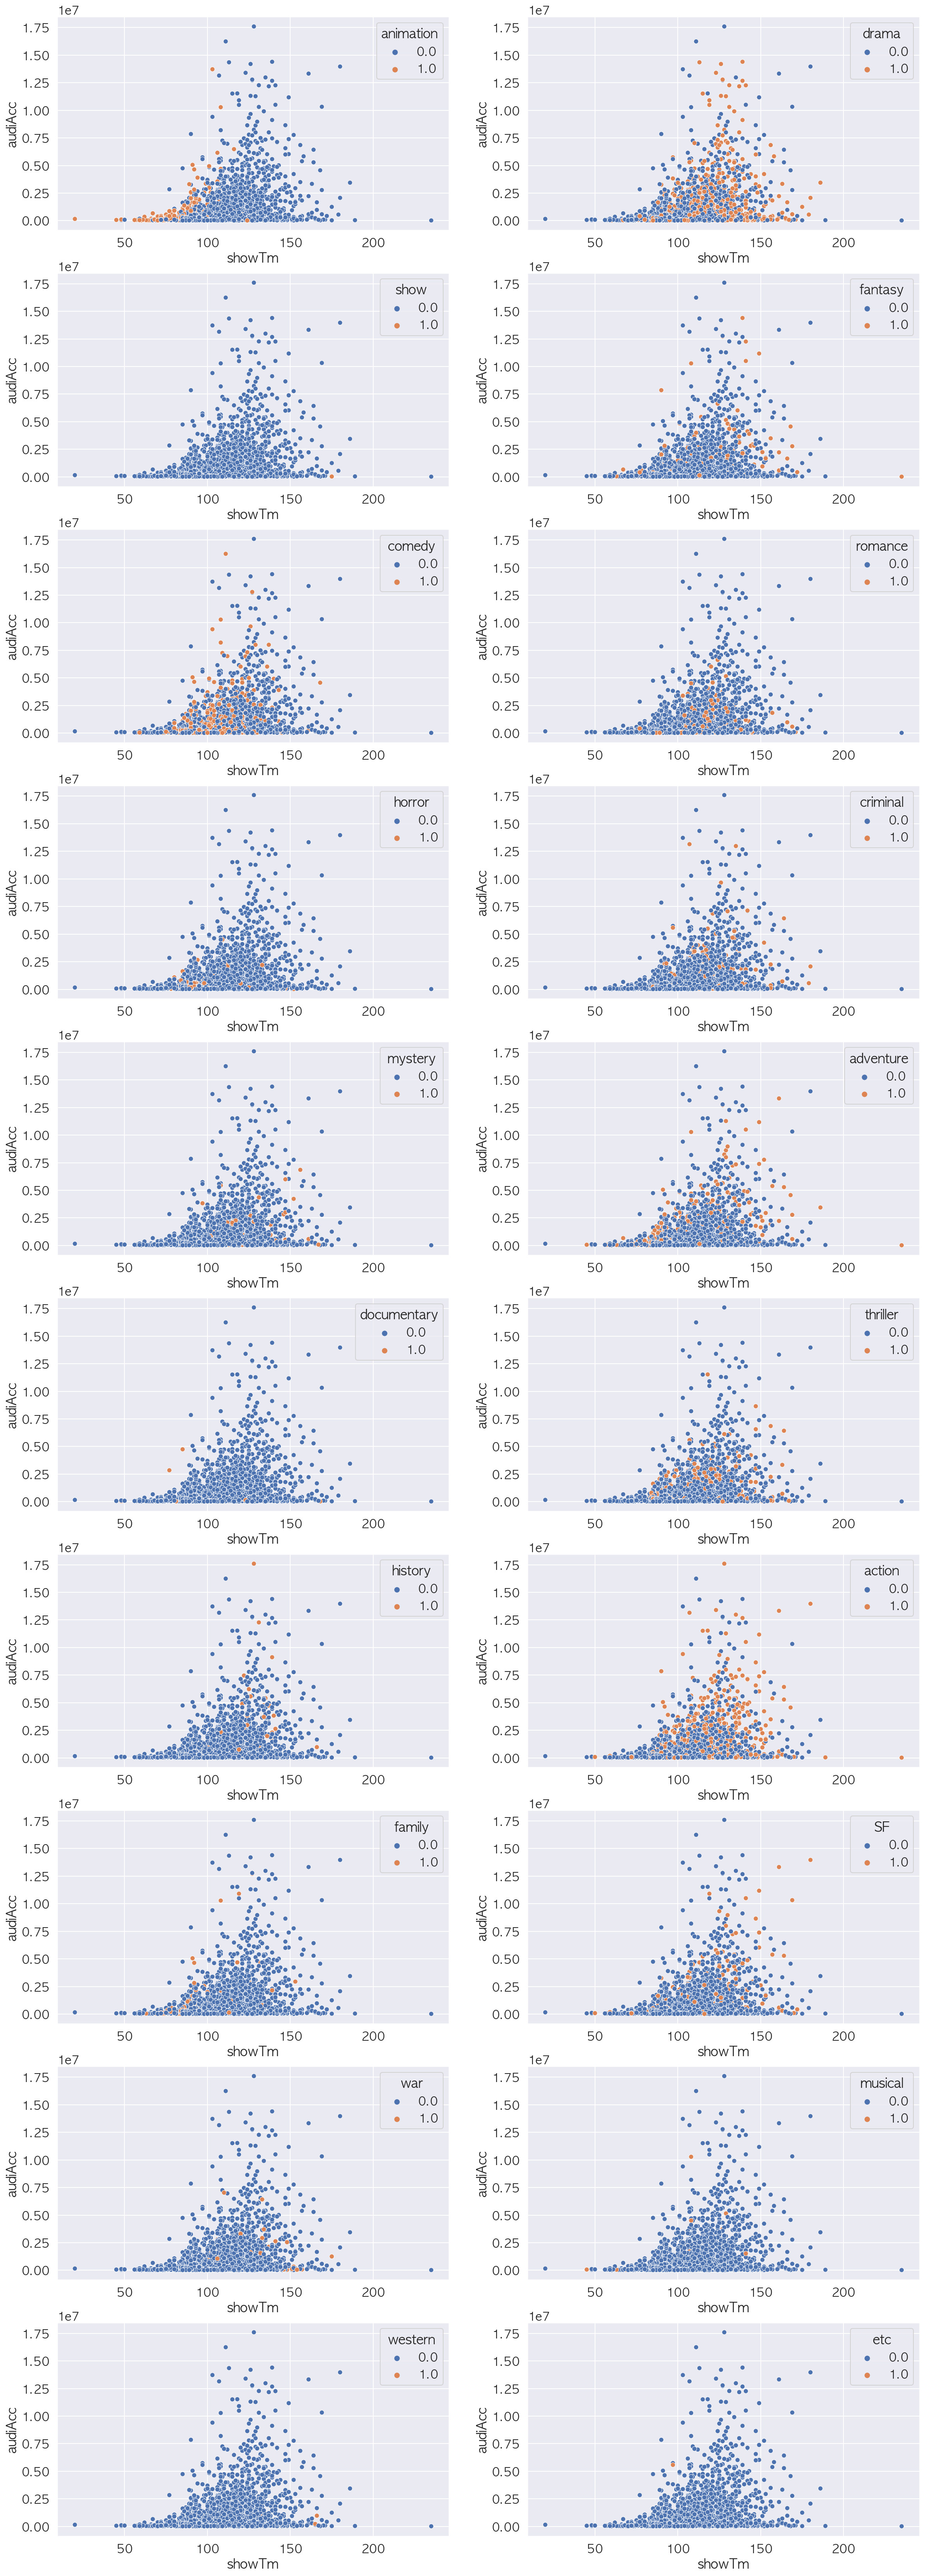

In [697]:
fig, axes = plt.subplots(10, 2, figsize=(20,60))

genre_index = 0
for ax_set in axes:
    for ax in ax_set:
        genre = genre_cols[genre_index]
        sns.scatterplot(x='showTm', y='audiAcc', hue=genre, data=movie_df, ax=ax)
        genre_index += 1

In [698]:
movie_df["showTm"].mean()

109.36908177905309


- 평균 상영시간인 109분을 기준으로, <br>
평균 상영시간이 짧은 장르: 애니메이션, 코미디, 호러 <br> 
평균 상영시간이 긴 장르:  판타지, 전쟁, 액션, 어드벤쳐, 역사 등... <br> <br>

각 장르에 맞는 상영시간이 분명히 존재해 보입니다. <br>
판타지나 어드벤쳐, SF 같은 경우에는 현실세계와 다른 새로운 세계관 및 서사 배경을 설명해야 하기 때문에 대체적으로 길며, <br>
코미디나 호러, 가족영화, 애니메이션 같은 경우엔 스토리같은 전체적인 부분보단 요소에 집중한 장르이기 때문에 대체적으로 짧습니다. <br>

모든 장르를 아우러 보았을 때, 일반적으로 러닝타임이 100분이 안되면 평균적으로 저조한 관객 수를 기록합니다. <br>
배우들은 100분이 안되는 시나리오를 받았을 때, 긍정적으로 검토하긴 힘들겠습니다.

## 5) 지원해주는 회사가 많으면 관객 수가 높을까?

<div style="font-size: 16px;">- 지원 회사 종류) 배급사 수입사 제작사 공급사 수출사 투자사 </div> 

In [699]:
for i in range(len(movie_df)):
    num_of_company = 0
    
    for company_col in company_cols:
        company = movie_df.loc[i, company_col]
        if company != "없음":
            num_of_company += 1
    
    movie_df.loc[i, "num_of_company"] = num_of_company

Text(0.5, 1.0, '지원회사 수에 따른 평균 관객 수')

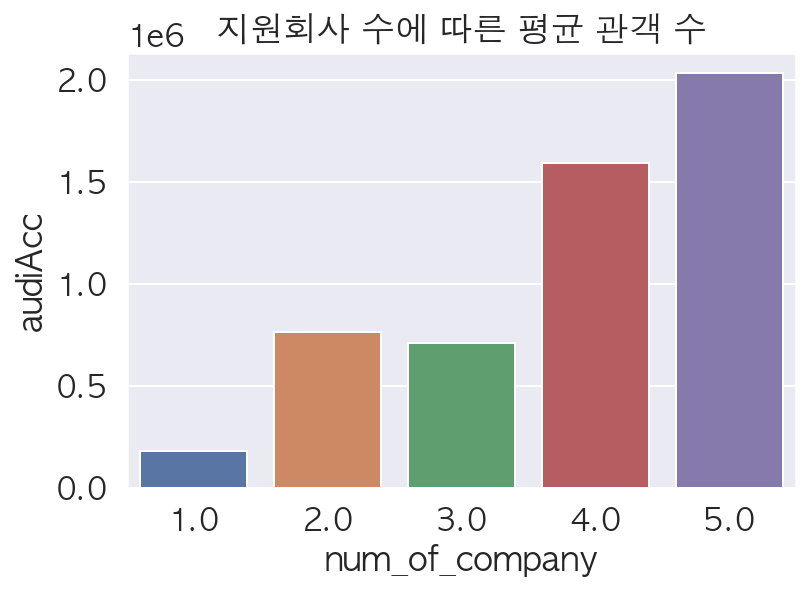

In [700]:
sns.barplot(x=movie_df["num_of_company"], y=movie_df["audiAcc"], ci=None)
plt.title("지원회사 수에 따른 평균 관객 수")

- **<div style="font-size: 16px;"> 지원해주는 회사가 많을수록 평균 관객 수가 높아지는 양의 관계를 가집니다. </div>**

In [701]:
movie_df[movie_df["directors"] == "D.J. 카루소"][actor_cols]

actorNm_1  actorNm_2 actorNm_3 actorNm_4 actorNm_5
680       빈 디젤  사무엘 L. 잭슨     루비 로즈   니나 도브레브     토니 콜렛
1641  티모시 올리펀트    알렉스 페티퍼        없음        없음        없음
2023   샤이아 라보프     미셸 모나한    도니 제프콧        없음        없음
2217   샤이아 라보프      사라 로머        없음        없음        없음
2753     에단 호크    안젤리나 졸리   키퍼 서덜랜드        없음        없음

In [ ]:
# movie_df["directors"].value_c
popular_director = movie_df.groupby("directors")["audiAcc"].mean()[:10].index

for director in popular_director:
    print(movie_df[movie_df["directors"] == director][actor_cols])
    answer = input("다음 입력")
    if answer == "out":
        break

/var/folders/21/j_x6z79s3kq2y6dtypdlmh8r0000gn/T/ipykernel_3204/62744806.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  graph_data = pd.Series()
/var/folders/21/j_x6z79s3kq2y6dtypdlmh8r0000gn/T/ipykernel_3204/62744806.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  graph_data = pd.Series()
/var/folders/21/j_x6z79s3kq2y6dtypdlmh8r0000gn/T/ipykernel_3204/62744806.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  graph_data = pd.Series()
/var/folders/21/j_x6z79s3kq2y6dtypdlmh8r0000gn/T/ipykernel_3204/62744806.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a fut

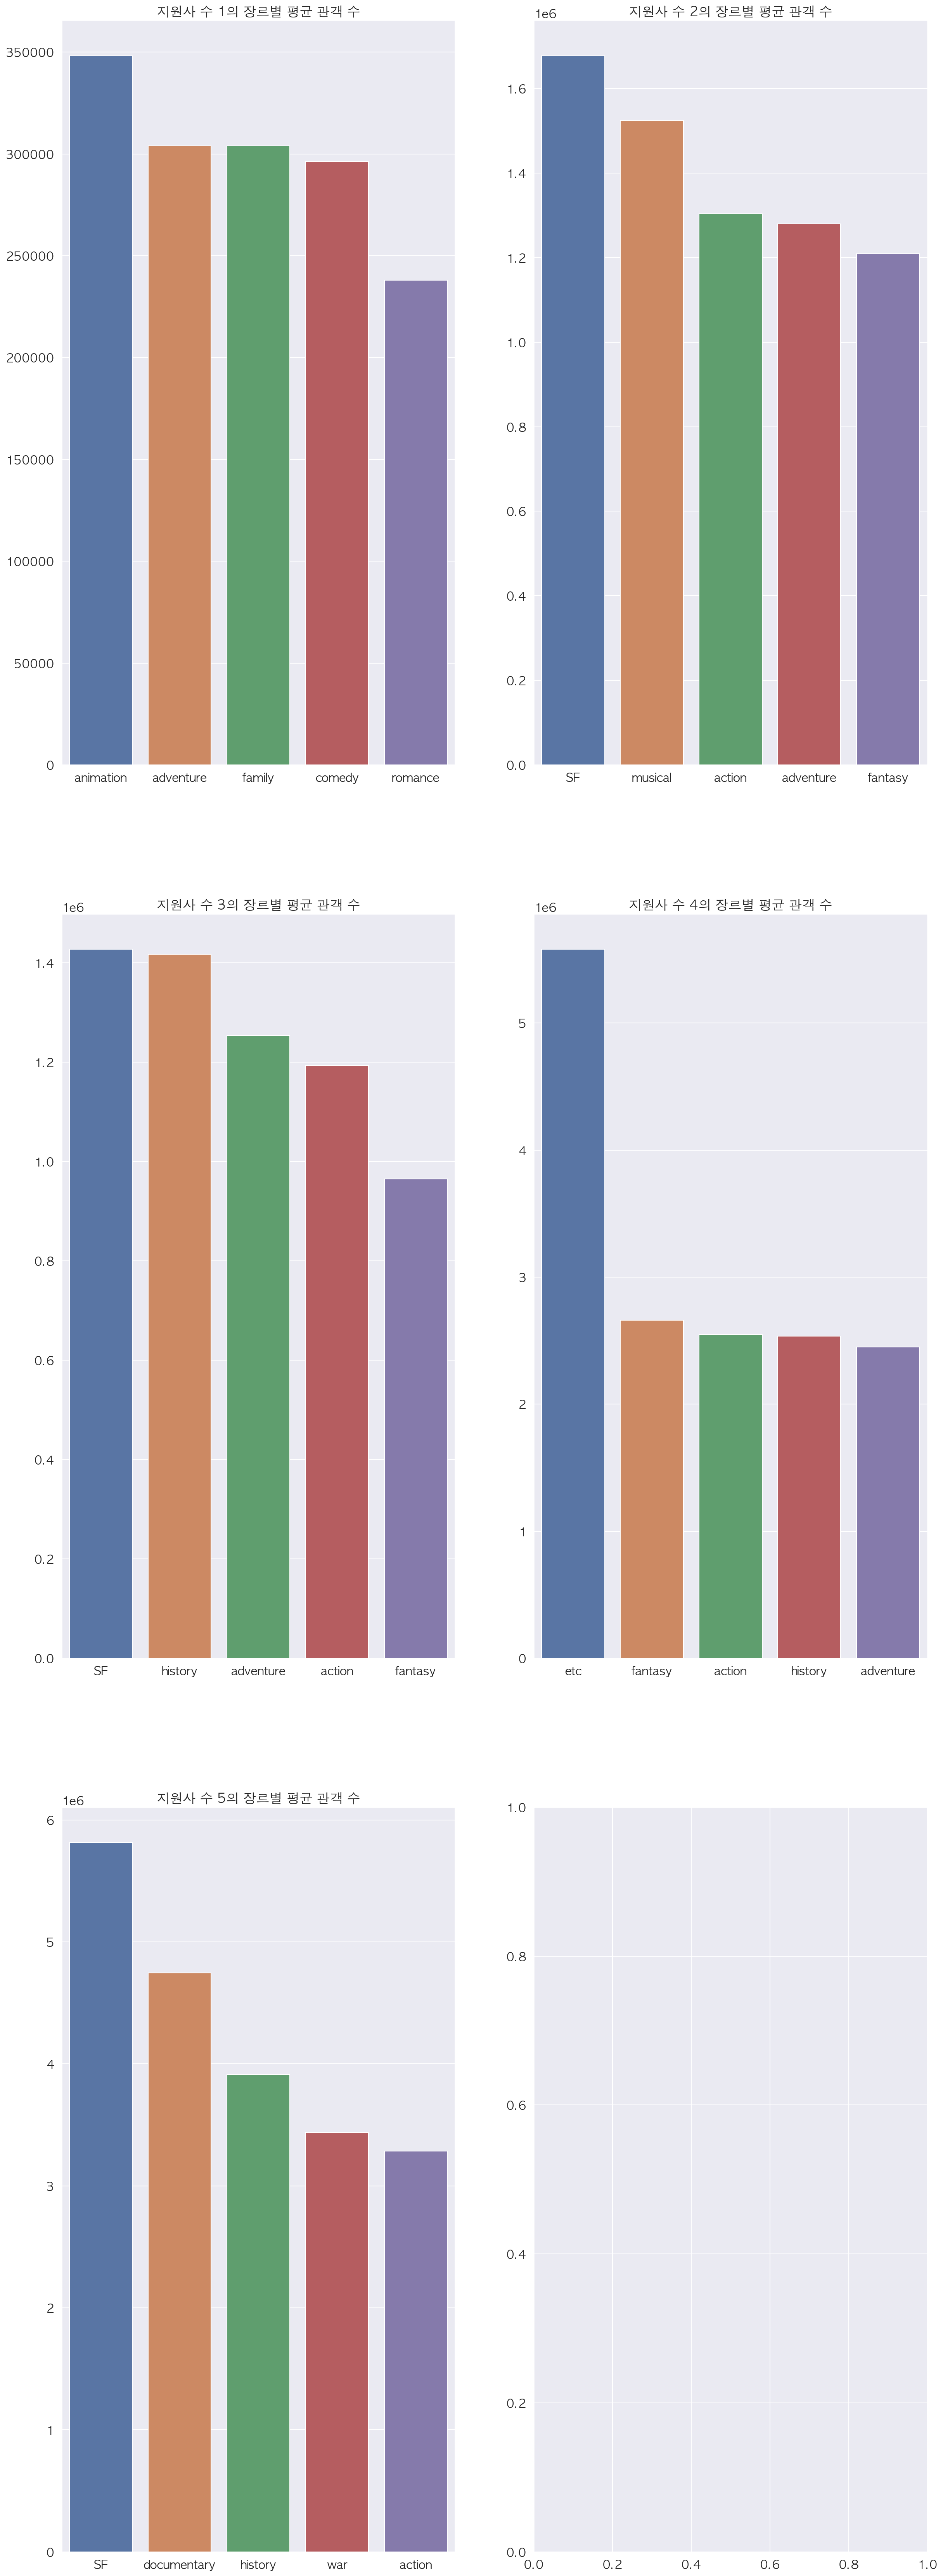

In [719]:
# 지원 회사 수 별, 평균 관객 수가 높은 탑 5 장르 가져오기
genre_col_dict = {genre: 0 for genre in genre_cols}
fig, axes      = plt.subplots(3, 2, figsize=(20,60))

axes_outer_index = 0
axes_inner_index = 0
for company_num in range(1, 6):
    company_one_df = movie_df[movie_df["num_of_company"] == company_num]
    for genre in genre_col_dict:

        # 장르별 누적 관객 수 산출
        mean_audi = company_one_df[company_one_df[genre] == 1]["audiAcc"].mean()
        if np.isnan(mean_audi):
            mean_audi = 0
        genre_col_dict[genre] = mean_audi
    
    graph_data = pd.Series()
    for data in sorted(genre_col_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
        genre_name = data[0]
        genre_audi = data[1]

        graph_data = graph_data.append(pd.Series({genre_name: genre_audi}))
    
    sns.barplot(
        x=graph_data.index,
        y=graph_data,
        ax=axes[axes_outer_index][axes_inner_index]
    ).set_title(f"지원사 수 {company_num}의 장르별 평균 관객 수")
    axes_inner_index += 1
    if axes_inner_index == 2:
        axes_outer_index += 1
        axes_inner_index = 0

In [720]:
for data in sorted(genre_col_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
    graph_data = pd.Series()
    genre_name = data[0]
    genre_audi = data[1]
    
    graph_data.append(pd.Series({genre_name: genre_audi}))

/var/folders/21/j_x6z79s3kq2y6dtypdlmh8r0000gn/T/ipykernel_3204/3029075779.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  graph_data = pd.Series()


In [721]:
pd.Series(genre_col_dict)

animation      787040.750
drama         2256359.723
show                0.000
fantasy       1874026.750
comedy        1825028.765
romance       1128103.935
horror        1032480.800
criminal      2962586.000
mystery       1177723.200
adventure      939409.500
documentary   4746458.000
thriller      1436168.706
history       3911383.250
action        3284788.980
family        2347333.333
SF            5813648.800
war           3439289.857
musical        245854.000
western             0.000
etc                 0.000
dtype: float64

In [722]:
movie_df[movie_df["etc"] == 1]

movieCd         movieNm     audiAcc     salesAcc  showTm prdtStatNm  \
243   20193275  브링 더 소울 : 더 무비  274064.000   2368846100 101.000         개봉   
370   20183050  번 더 스테이지: 더 무비  298402.000   2533014600  82.000         개봉   
1231  20134268    버틀러: 대통령의 집사  108222.000    759425000 132.000         개봉   
1269  20136052        더 테러 라이브 5580701.000  39847400317  97.000         개봉   

     nations directors    audits  openYear  ...  director_salesPreAcc  \
243       한국       박준수     전체관람가      2019  ...        2533014600.000   
370       한국       박준수     전체관람가      2018  ...                 0.000   
1231      미국    리 다니엘스  15세이상관람가      2013  ...                 0.000   
1269      한국       김병우  15세이상관람가      2013  ...                 0.000   

      companyCd         distribution             importer  production  \
243    20204721           CGV ICECON                   없음  빅히트 엔터테인먼트   
370    20161801   월트디즈니컴퍼니코리아 유한책임회사                   없음  빅히트 엔터테인먼트   
1231   20100932  (주)넥스트엔터테인먼트월드(NEW)  (주)넥스트엔터테인먼트월드(NEW)          없음   
1269   20100520        롯데쇼핑㈜롯데엔터테인먼트                   없음     (주)씨네이천   

           supplier  overseas sales  joint venture  continent  num_of_company  
243              없음              없음             없음       asia           2.000  
370              없음              없음             없음       asia           2.000  
1231             없음              없음             없음    america           2.000  
1269  롯데쇼핑㈜롯데엔터테인먼트   롯데쇼핑㈜롯데엔터테인먼트             없음       asia           4.000  

[4 rows x 55 columns]

In [723]:
movie_df[movie_df["num_of_company"] == 1][genre_cols].sum().sort_values(ascending=False)[:5]

drama       6.000
animation   4.000
fantasy     4.000
comedy      4.000
romance     4.000
dtype: float64

In [724]:
movie_df[movie_df["num_of_company"] == 2][genre_cols].sum().sort_values(ascending=False)[:5]

action      394.000
drama       369.000
animation   285.000
adventure   265.000
thriller    242.000
dtype: float64

In [725]:
movie_df[movie_df["num_of_company"] == 3][genre_cols].sum().sort_values(ascending=False)[:5]

drama       270.000
action      207.000
comedy      173.000
thriller    127.000
animation   109.000
dtype: float64

In [726]:
movie_df[movie_df["num_of_company"] == 4][genre_cols].sum().sort_values(ascending=False)[:5]

drama      248.000
comedy     145.000
action     101.000
thriller    82.000
romance     79.000
dtype: float64

In [727]:
movie_df[movie_df["num_of_company"] == 5][genre_cols].sum().sort_values(ascending=False)[:5]

drama      119.000
comedy      68.000
action      49.000
romance     46.000
thriller    34.000
dtype: float64

# 4. train test split

In [728]:
train_all = movie_df[movie_df["openYear"] < 2018].reset_index(drop=True)
test_all  = movie_df[movie_df["openYear"] >= 2018].reset_index(drop=True)

/opt/homebrew/Caskroom/miniforge/base/envs/nano/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


17597914.0

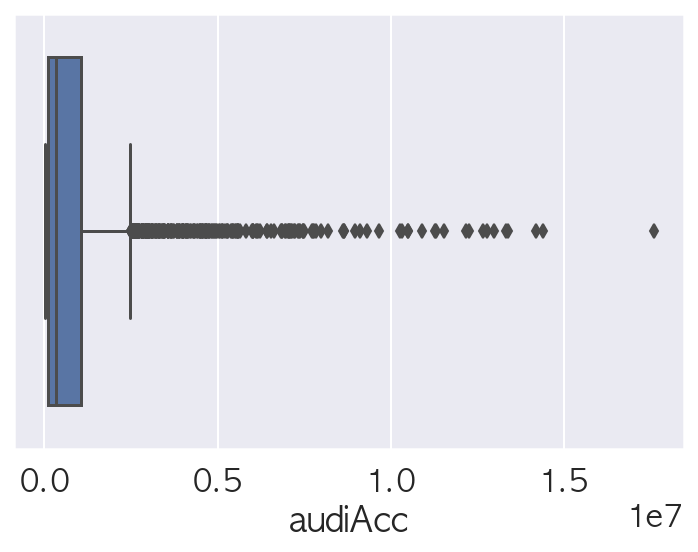

In [729]:
sns.boxplot(train_all["audiAcc"])
train_all["audiAcc"].quantile(q=1)

In [730]:
q1 = train_all["audiAcc"].quantile(q=0.25)
q3 = train_all["audiAcc"].quantile(q=0.75)
iqr = q3 - q1
audi_acc_outlier = q3 + 1.5*iqr
audi_acc_outlier

2471532.5

- outlier 값 이상인 영화들을 흥행으로 잡겠습니다.

In [731]:
train_smash_movie_indices     = train_all[train_all["audiAcc"] >= audi_acc_outlier].index
train_not_smash_movie_indices = train_all[train_all["audiAcc"] < audi_acc_outlier].index

train_all.loc[train_smash_movie_indices, "is_smashed"] = 1
train_all.loc[train_not_smash_movie_indices, "is_smashed"] = 0

test_smash_movie_indices     = test_all[test_all["audiAcc"] >= audi_acc_outlier].index
test_not_smash_movie_indices = test_all[test_all["audiAcc"] < audi_acc_outlier].index

test_all.loc[test_smash_movie_indices, "is_smashed"]      = 1
test_all.loc[test_not_smash_movie_indices, "is_smashed"] = 0

# 5. feature engineering

## 1) 영화 제목 텍스트 분석 및 변수 생성
- <div style="font-size: 16px;">분석 목적: 어떤 분야이든 어느정도의 임계치를 넘어선 상위 그룹은 공통점을 가집니다. <br>
따라서, 인기 있는 그룹의 영화 제목들도 공통점을 가질 것이라 가정하여 분석을 진행합니다.</div>

In [732]:
from soynlp           import DoublespaceLineCorpus
from soynlp.word      import WordExtractor
from soynlp.tokenizer import LTokenizer

In [733]:
# 100만명 이상 관객수만 추출
top_movie_df   = train_all.sort_values('audiAcc',ascending=False)[:594].reset_index(drop=True) 
top_movie_list = top_movie_df['movieNm'].tolist()

In [734]:
len(top_movie_list)

594

In [735]:
tokenizer = LTokenizer()
sent = "어벤져스"
tokenizer.tokenize(sent, flatten=False)

[('어벤져스', '')]

In [736]:
movie_title_list = []

for name in top_movie_list:
    movie_title_list.append(tokenizer.tokenize(name, flatten=True))

In [737]:
korean_stopwords_path = "stopwords-ko.txt"

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

In [738]:
title = []

for i in range(len(movie_title_list)):
    for j in range(len(movie_title_list[i])):
        if movie_title_list[i][j] not in stopwords:
            title.append(movie_title_list[i][j])

In [739]:
import re

top_movie_title_word = [re.sub('[^A-Za-z가-힣]', '', i) for i in title]
top_movie_title_word.remove('')

In [740]:
#가장 많이 쓰이는 단어 200개 추출한다.
from collections import Counter

count_movie_title = Counter(top_movie_title_word).most_common(200)
del count_movie_title[0]

In [741]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path="THEletssmileL.otf" ,
        width=width, height=height,
        stopwords=stopwords, 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()


title_word_cloud = str(count_movie_title)

title_word_cloud=wordcloud(title_word_cloud, width=1200, height=500)

In [742]:
top_movie_title_list = []

# 빈도수가 4개 이상인 단어들을 list로 넣어준다. 
for movie, count in count_movie_title:
    if count >= 4:
        top_movie_title_list.append(movie)

# top_movie_title_list

In [743]:
train_all['movieNm'].str.count('|'.join(top_movie_title_list))

0       2
1       0
2       0
3       0
4       0
       ..
2287    0
2288    0
2289    0
2290    0
2291    0
Name: movieNm, Length: 2292, dtype: int64

In [744]:
for i in range(len(train_all)):
    train_all.loc[i,'top_keyword_count'] = train_all['movieNm'].str.count('|'.join(top_movie_title_list))[i]

# train_all.top_keyword_count.value_counts()

In [745]:
#테스트 데이터에 대해서도 top_keyword_count 변수를 생성해줍니다.

for i in range(len(test_all)):
    test_all.loc[i,'top_keyword_count'] = test_all['movieNm'].str.count('|'.join(top_movie_title_list))[i]

In [746]:
plt.figure(figsize=(12,8))
sns.barplot(data=train_all,x='top_keyword_count',y='audiAcc',ci=None,estimator=np.mean)

<AxesSubplot:xlabel='top_keyword_count', ylabel='audiAcc'>

In [747]:
top_movie_title_list
# top_movie_title_word

['가문의',
 '해적',
 '트랜스포머',
 '스파이더맨',
 '전쟁',
 '시작',
 '엑스맨',
 '분노의',
 '월드',
 '캐리비안의',
 '영광',
 '해리',
 '포터와',
 '질주',
 '최후의',
 '게임',
 '날']

- **<div style="font-size: 16px;">인기있는 영화들을 대상으로 반복되는 단어가 있을까 하여 진행하였습니다. <br>
보시다시피 데이터가 적기 때문에 시리즈물이나 인기있는 영화의 제목이 자주 등장한 것을 볼 수 있습니다. <br>
따라서, top_keyword_count는 유의미한 변수라고 보기 힘듭니다.</div>**

## 2) 성수기 변수 생성

<AxesSubplot:xlabel='openMonth', ylabel='audiAcc'>

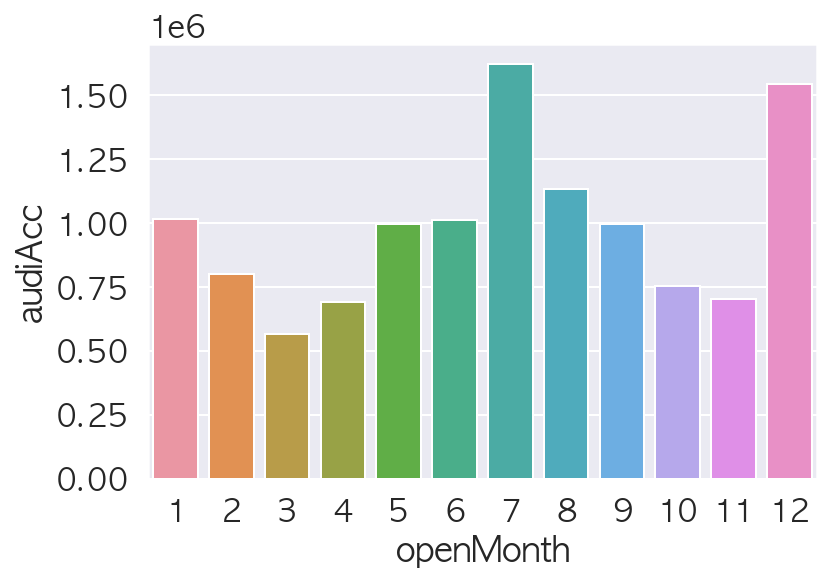

In [748]:
sns.barplot(x=train_all["openMonth"], y=train_all["audiAcc"], ci=None)

In [749]:
vacation_month = [7, 8, 12, 1]

for i in range(len(train_all)):
    month = train_all.loc[i, "openMonth"]
    if month in vacation_month:
        train_all.loc[i, "is_peak"] = 1
    else:
        train_all.loc[i, "is_peak"] = 0
        
for i in range(len(test_all)):
    month = test_all.loc[i, "openMonth"]
    if month in vacation_month:
        test_all.loc[i, "is_peak"] = 1
    else:
        test_all.loc[i, "is_peak"] = 0

## 3) 장르별 평균 누적관객수 합 변수 생성

In [750]:
genre_cols = [
    'animation', 'action', 'show', 'fantasy', 'thriller',
    'comedy', 'drama', 'adventure', 'criminal', 'mystery',
    'family', 'documentary', 'romance', 'horror', 'western',
    'SF', 'war', 'history', 'etc', 'musical'
]

In [751]:
genre_avg_audi_acc = {}
for genre in genre_cols:
    audi_acc = train_all[train_all[genre] == 1]["audiAcc"].mean()
    genre_avg_audi_acc[genre] = audi_acc

In [752]:
for index in range(len(train_all)):
    genre_audi_acc = []
    for genre in genre_cols:
        if train_all.loc[index, genre] == 1:
            genre_audi_acc.append(genre_avg_audi_acc[genre])
    
    train_all.loc[index, "genre_avg_audiAcc"] = np.mean(genre_audi_acc)
    
for index in range(len(test_all)):
    genre_audi_acc = []
    for genre in genre_cols:
        if test_all.loc[index, genre] == 1:
            genre_audi_acc.append(genre_avg_audi_acc[genre])
    
    test_all.loc[index, "genre_avg_audiAcc"] = np.mean(genre_audi_acc)

In [753]:
train_all = train_all.drop(genre_cols, axis=1)
test_all  = test_all.drop(genre_cols, axis=1)

## 4) 주별 영화 개봉수 변수 생성

In [754]:
from datetime import datetime, timedelta

def get_date(y, m, d):
    s = f'{y:04d}-{m:02d}-{d:02d}'
    return datetime.strptime(s, '%Y-%m-%d')

d = get_date(2020, 4, 20)
f = d.replace(day=1) # 생성한 날짜에 대해 해당월의 1일은 replace() 메소드를 사용한다.

def get_week_no(y, m, d):
    target = get_date(y, m, d)
    firstday = target.replace(day=1)
    if firstday.weekday() == 6:
        origin = firstday
    elif firstday.weekday() < 3:
        origin = firstday - timedelta(days=firstday.weekday() + 1)
    else:
        origin = firstday + timedelta(days=6-firstday.weekday())
    return (target - origin).days // 7 + 1

In [755]:
# train
for i in range(len(train_all)):
    train_all.loc[i,'week'] = get_week_no(train_all['openYear'][i],train_all['openMonth'][i],train_all['openDay'][i])

week_movie_num    = train_all.groupby(['openYear','openMonth','week'])['movieNm'].count().values.tolist()
movie_weekly_list = []
for i in week_movie_num:
    if i != 1:
        k = i
        for j in range(k):
            movie_weekly_list.append(k) 
    else:
        movie_weekly_list.append(i)

for index,value in enumerate(movie_weekly_list):
    train_all.loc[index,'week_movie_count'] = value

# test
for i in range(len(test_all)):
    test_all.loc[i,'week'] = get_week_no(test_all['openYear'][i],test_all['openMonth'][i],test_all['openDay'][i])

week_movie_num    = test_all.groupby(['openYear','openMonth','week'])['movieNm'].count().values.tolist()
movie_weekly_list = []
for i in week_movie_num:
    if i != 1:
        k = i
        for j in range(k):
            movie_weekly_list.append(k) 
    else:
        movie_weekly_list.append(i)

for index,value in enumerate(movie_weekly_list):
    test_all.loc[index,'week_movie_count'] = value

## 5) 메이저 회사 개수 변수 생성

- 지원해주는 회사별 평균 누적 관객수 top 10 회사를 뽑아 해당 영화에 지원을 해주는 유명회사 수를 산출합니다.

In [756]:
major_company_dict = {}
for company_col in company_cols:
    
    # 10개 작품 이상 회사
    company_num_of_movie = train_all[company_col].value_counts()
    major_companies      = company_num_of_movie[train_all[company_col].value_counts().sort_values(ascending=False) >= 10].index
    
    major_company_data = {}
    for major_company in major_companies:
        company_audi_acc = train_all.groupby(company_col)["audiAcc"].mean().sort_values(ascending=False)
        
        if (major_company in company_audi_acc.index) & (company_audi_acc[major_company] >= 500000):
            if major_company == "없음":
                continue
            major_company_data[major_company] = company_audi_acc[major_company]
    major_company_dict[company_col] = major_company_data

In [757]:
for i in range(len(train_all)):
    major_company_num = 0
    for company_col in major_company_dict:
        company         = train_all.loc[i, company_col]
        major_companies = major_company_dict[company_col].keys()
        
        if company in major_companies:
            major_company_num += 1
            
    train_all.loc[i, "major_company_num"] = major_company_num
    

for i in range(len(test_all)):
    major_company_num = 0
    for company_col in major_company_dict:
        company         = test_all.loc[i, company_col]
        major_companies = major_company_dict[company_col].keys()
        
        if company in major_companies:
            major_company_num += 1
            
    test_all.loc[i, "major_company_num"] = major_company_num

# 6. scaling

In [120]:
# 모델에 필요한 feature들을 선정했습니다.

train_all = train_all[['movieCd', 'movieNm', 'showTm', 'audits', 'prdtStatNm', 
                       'nations', 'showTypeNm',
                 'directors','director_audiPreAcc', 'is_peak', 'openYear', 'openMonth','openDay',
                 'companyCd', 'major_company_num',
                 'top_actor_num', 'audiAcc', 'genre_avg_audiAcc', 'week_movie_count', 'is_smashed']]

test_all = test_all[['movieCd', 'movieNm','showTm','audits', 'prdtStatNm', 
                     'nations', 'showTypeNm',
                 'directors','director_audiPreAcc', 'is_peak',
                 'openYear', 'openMonth', 'openDay',
                 
                 'companyCd', 'major_company_num',
                 'top_actor_num', 'audiAcc', 'genre_avg_audiAcc', 'week_movie_count', 'is_smashed']]

In [121]:
temp_train_all = train_all[::]
temp_test_all  = test_all[::]

In [122]:
train_all = temp_train_all[::]
test_all  = temp_test_all[::]

In [123]:
num_columns = [
    'top_actor_num', "showTm",
    "director_audiPreAcc",
    "openYear", "openMonth", "openDay",
    "genre_avg_audiAcc", 'major_company_num'
]

In [124]:
X_train = train_all[train_all.columns.difference(["audiAcc"])]
y_train = train_all["audiAcc"]

X_test = test_all[test_all.columns.difference(["audiAcc"])]
y_test = test_all["audiAcc"]

## 1) Standard scaling

In [125]:
type(y_train)
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_scaler.fit(X_train[num_columns])
X_train.loc[:, num_columns] = std_scaler.transform(X_train[num_columns])
X_test.loc[:, num_columns]  = std_scaler.transform(X_test[num_columns])

std_scaler.fit(np.array(y_train).reshape(-1, 1))
y_train = std_scaler.transform(np.array(y_train).reshape(-1, 1))
y_test  = std_scaler.transform(np.array(y_test).reshape(-1, 1))

/opt/homebrew/Caskroom/miniforge/base/envs/nano/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/homebrew/Caskroom/miniforge/base/envs/nano/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## 2) Robust scaling

In [127]:
# from sklearn.preprocessing import RobustScaler
# rs = RobustScaler()

In [128]:
# rs.fit(X_train[num_columns])
# X_train.loc[:, num_columns] = rs.transform(X_train[num_columns])
# X_test.loc[:, num_columns] = rs.transform(X_test[num_columns])

In [129]:
# rs.fit(np.array(y_train).reshape((-1, 1)))

# y_train = rs.transform(np.array(y_train).reshape((-1, 1)))
# y_test = rs.transform(np.array(y_test).reshape((-1, 1)))

# 7. Encoding

In [130]:
temp_train = X_train[::]
temp_test  = X_test[::]

In [131]:
X_train = temp_train[::]
X_test  = temp_test[::]

drop_cols = [
    "movieNm", "prdtStatNm", "movieCd", "companyCd", 
    "directors", "nations", "showTypeNm",
]

- actors의 특징을 설명해줄 수 있는 feature를 생성했으므로 one-hot encoding이 필요 없다고 판단하였습니다. <br>
왜냐하면, 배우의 이름이 중요한 것이 아닌, 그 배우의 실적과 특징이 중요한 것이기 때문입니다.

- companys 열들을 넣는 이유는, companys 특징을 추가적으로 설명해줄 수 있는 열이 없기 때문에 <br>
회사 이름 자체가 학습에 도움이 된다 판단하여 one-hot encoding을 진행합니다.(실제로 보다 좋은 점수)


## 1) One hot encoding

In [132]:
from sklearn.preprocessing import OneHotEncoder

ohe_cat_columns = [
    'nations', 
    'showTypeNm',
]
ohe = OneHotEncoder(sparse=False) # 행렬이 아닌 1차원 array로 반환을 해준다.

X_all = pd.concat([X_train[ohe_cat_columns], X_test[ohe_cat_columns]], axis=0)
ohe.fit(X_all[ohe_cat_columns])

OneHotEncoder(sparse=False)

In [133]:
ohe_cols = []
for index in range(len(ohe.categories_)):
    cat_cols = ohe.categories_[index]
    for col in cat_cols:
        ohe_cols.append(col)

In [134]:
new_X_train_cat = pd.DataFrame(ohe.transform(X_train[ohe_cat_columns]), columns=ohe_cols)
new_X_test_cat  = pd.DataFrame(ohe.transform(X_test[ohe_cat_columns]), columns=ohe_cols)

X_train = pd.concat([X_train, new_X_train_cat], axis=1)
X_test  = pd.concat([X_test, new_X_test_cat], axis=1)

X_train = X_train.drop(drop_cols, axis=1)
X_test  = X_test.drop(drop_cols, axis=1)

## 2) Label encoding

In [135]:
from sklearn.preprocessing import LabelEncoder

le_cat_columns = [
    "openYear", "openMonth", "openDay",
    "audits"
]
le = LabelEncoder()

X_all = pd.concat([X_train[le_cat_columns], X_test[le_cat_columns]], axis=0)

le.fit(X_all[cat_col])
for cat_col in le_cat_columns:
    # le.fit(X_all[cat_col])
    X_train[cat_col] = le.transform(X_train[cat_col])
    X_test[cat_col]  = le.transform(X_test[cat_col])

In [136]:
# 2차원 배열을 1차원으로 만든 후, Series화 시킵니다.
y_train = [array[0] for array in y_train]
y_test  = [array[0] for array in y_test]

y_train = pd.Series(y_train, name="audiAcc")
y_test  = pd.Series(y_test, name="audiAcc")

train_all = pd.concat([X_train, pd.DataFrame(y_train, columns=["audiAcc"])], axis=1)
test_all  = pd.concat([X_test, pd.DataFrame(y_test, columns=["audiAcc"])], axis=1,)

# 흥행 여부 분류 모델의 train, test
cls_X_train = train_all[train_all.columns.difference(["is_smashed", "audiAcc"])]
cls_y_train = train_all["is_smashed"]

cls_X_test = test_all[test_all.columns.difference(["is_smashed", "audiAcc"])]
cls_y_test = test_all["is_smashed"]

# 관객 수 예측 모델의 train, test
reg_X_train = train_all[train_all.columns.difference(["audiAcc", "is_smashed"])]
reg_y_train = train_all["audiAcc"]

reg_X_test = test_all[test_all.columns.difference(["audiAcc", "is_smashed"])]
reg_y_test = test_all["audiAcc"]

# 8. Modeling

## 1) 흥행 여부 분류 모델

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics      import (
    mean_squared_error, mean_absolute_error, 
    r2_score, accuracy_score, 
    recall_score, precision_score,
    f1_score
)

def print_metrics(y, pred_y, title=None):
    print(title)
    print("정확도:", accuracy_score(y,y_pred))
    print("재현율(recall):", recall_score(y,y_pred))
    print("정밀도(precision):", precision_score(y,y_pred))
    print('F1-sore:', f1_score(y,y_pred))

In [154]:
# 분류 모델
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(cls_X_train, cls_y_train)
y_pred = rfc.predict(cls_X_test)
print_metrics(cls_y_test, y_pred, "RandomForestClassifier 성능")

print()

lr = LogisticRegression(n_jobs=-1)
lr.fit(cls_X_train, cls_y_train)
y_pred = lr.predict(cls_X_test)
print_metrics(cls_y_test, y_pred, "LogisticRegression 성능")

RandomForestClassifier 성능
정확도: 0.8669354838709677
재현율(recall): 0.19402985074626866
정밀도(precision): 0.52
F1-sore: 0.28260869565217395

LogisticRegression 성능
정확도: 0.8588709677419355
재현율(recall): 0.23880597014925373
정밀도(precision): 0.45714285714285713
F1-sore: 0.3137254901960784


/opt/homebrew/Caskroom/miniforge/base/envs/nano/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/nano/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [139]:
# 회귀 모델
rfr = RandomForestRegressor(n_jobs=-1, random_state=42)
rfr.fit(reg_X_train, reg_y_train)
y_pred = rfr.predict(reg_X_test)

In [140]:
r2score = r2_score(y_true=reg_y_test, y_pred=y_pred) ## R2 score
rmse    = np.sqrt(mean_squared_error(y_true=reg_y_test, y_pred=y_pred)) ## RMSE
mae     = mean_absolute_error(y_true=reg_y_test, y_pred=y_pred) ## MAE

In [141]:
print(f"r2score: {r2score}")
print(f"rmse   : {rmse}")
print(f"mae    : {mae}")

r2score: 0.26526919324135523
rmse   : 1.137875174676933
mae    : 0.5979333554087205


/opt/homebrew/Caskroom/miniforge/base/envs/nano/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 참고 문헌

- 서정민, "영진위 코로나19로 올해 한국 영화 매출 최대 70% 급감 전망", <br>
2020-05-12, https://www.hani.co.kr/arti/culture/culture_general/944574.html

- 영화진흥위원회, 영화관입장권통합전산망 관련 영비법 <br>
https://www.kobis.or.kr/kobis/business/comm/comm/openStatute.do